In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

In [2]:
Allgraphs_SW = "../Data/reddit_suicideWatch/SW_morethan10_graphs_complete_revised/SW_morethan10_deeper_replygraphs_v3.pkl"
# Allgraphs_SW = "../Data/reddit_suicideWatch/SW_allValidThreads_graphs/SW_Allvalid_Graphs.pkl"
Allgraphs_BL2 = "../Data/reddit_TheDonald/theDonald_graph/TheDonald_replygraphs.pkl"
Allgraphs_BL = "../Data/reddit_askScience/reddit_askScience_Graphs/AskScience_replygraphs.pkl"

In [3]:
allGraphs_SW = pkl.load(open(Allgraphs_SW,'rb'))
allGraphs_BL = pkl.load(open(Allgraphs_BL,'rb'))
allGraphs_BL2 = pkl.load(open(Allgraphs_BL2,'rb'))

In [4]:
textDict = {}
for k in allGraphs_SW:
    postText = nx.get_node_attributes(allGraphs_SW[k],'text')
    textDict.update(postText)

In [5]:
len(allGraphs_SW)

10157

In [6]:
len(textDict)

216992

In [7]:
def readModeratorFile(f):
    modIds = []
    modMeta = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
        modMeta.append(k)
    return modIds, modMeta

In [8]:
SW_mods, SW_modMeta = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [9]:
print SW_mods, len(SW_mods)

[u'S2S2S2S2S2', u'qgyh2', u'Psy-Kosh', u'SicSemperHumanus', u'SQLwitch', u'UnDire', u'pkbooo', u'skyqween', u'MykeeB', u'circinia', u'svabhava-sunya', u'sofar1776'] 12


In [10]:
SW_modMeta[1]

{u'author_flair_css_class': None,
 u'author_flair_text': None,
 u'date': 1230644033.0,
 u'id': u't2_1uzpp',
 u'mod_permissions': [u'all'],
 u'name': u'qgyh2'}

In [11]:
import datetime
times = [datetime.datetime.fromtimestamp(int(k['date'])).strftime('%Y-%m-%d %H:%M:%S')  for k in SW_modMeta  ]

In [12]:
print times

['2008-12-16 13:46:24', '2008-12-30 13:33:53', '2010-01-10 17:51:57', '2010-09-09 08:16:49', '2010-09-16 04:17:50', '2011-12-11 21:53:18', '2012-02-08 01:47:35', '2012-09-16 21:45:42', '2013-11-17 13:10:44', '2014-06-05 02:57:29', '2014-07-08 12:15:35', '2017-11-12 00:53:36']


In [13]:
AS_mods = readModeratorFile("../Data/reddit_TheDonald/moderators.json")

In [14]:
print AS_mods , len(AS_mods)

([u'shadowman3001', u'Grakmarr', u'US2A', u'sublimeinslime', u'Trumpshaker', u'zettapede', u'thunderbert80', u'Ivaginaryfriend', u'Foss_is_Boss', u'mivvan', u'Katfish29', u'IanPatrick1966', u'lalicat', u'Trumpropriation', u'Knollsit', u'richmomz', u'SportzStar', u'lolmonger', u'MorePancakes', u'D4rkd3str0yer', u'Sanotsuto', u'bh506407', u'pm_me_yo_doggos', u'CovfefeBucks', u'eGOTheJudge', u'DrWeeGee', u'Keln78', u'DanWofSoc', u'BotForceOne', u'AutoModerator', u'Medically', u'Velostodon'], [{u'author_flair_css_class': u'tomahawkmissile', u'author_flair_text': u'MHM', u'mod_permissions': [u'all'], u'date': 1495507695.0, u'id': u't2_5y6sb', u'name': u'shadowman3001'}, {u'author_flair_css_class': u'treadonme', u'author_flair_text': u'1776', u'mod_permissions': [u'all'], u'date': 1508277635.0, u'id': u't2_a9f6l', u'name': u'Grakmarr'}, {u'author_flair_css_class': u'captain', u'author_flair_text': u'MAGA', u'mod_permissions': [u'all'], u'date': 1508277639.0, u'id': u't2_uuiui', u'name': u'US

In [15]:
# import csv
# fieldnames = ['postid', 'text']
# with open('../Data/reddit_suicideWatch/SW_Alltext.csv', 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in textDict:
#         dict_writer.writerow({'postid': k , 'text': textDict[k]})


In [31]:
LIWC_BL2 = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_BL = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_askScience/LIWC2015_AskScienceTop.csv")
# LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SW_Alltext.csv")

In [32]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [33]:
print len(LIWC_SW) , len(LIWC_BL2) , len(LIWC_BL)

419575 447177 22046


In [34]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_BL.drop(LIWC_BL.index[0])
LIWC_BL2.drop(LIWC_BL2.index[0])

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,t1_ddfth9o,A lifetime of believing left propaganda rots t...,9,99.00,50.00,98.01,25.77,9.00,33.33,77.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,t1_dan3bh2,[removed],1,92.84,50.00,99.00,25.77,1.00,100.00,100.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
3,t1_dce37jy,/u/IAmTuckerCarlson how can we actually be hea...,79,43.51,95.01,36.87,25.77,26.33,20.25,91.14,...,1.27,1.27,0.00,1.27,1.27,2.53,2.53,0.00,0.00,8.86
4,t1_dbdivvv,"Careful, if enough people start believing in t...",19,76.19,29.92,96.09,1.00,19.00,26.32,84.21,...,5.26,0.00,0.00,0.00,5.26,0.00,0.00,0.00,0.00,0.00
5,t1_d9bo376,And then what? What's the Cure? Medicine? Ma...,22,31.44,18.16,31.94,25.77,5.50,13.64,72.73,...,0.00,0.00,0.00,22.73,0.00,0.00,0.00,4.55,0.00,13.64
6,t1_dan3bh8,You dont need bots when you can willy nilly ch...,13,3.37,98.93,1.40,25.77,13.00,0.00,61.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.69
7,t1_de2nfzx,"That *is* ""rape rape"". What do you call non-c...",21,10.46,31.71,37.24,1.00,7.00,9.52,80.95,...,0.00,0.00,0.00,4.76,0.00,4.76,9.52,0.00,0.00,9.52
8,t1_d8c0umx,She really is a murderer. No one will care abo...,21,10.46,50.00,1.00,1.00,10.50,14.29,80.95,...,0.00,0.00,0.00,0.00,23.81,0.00,0.00,9.52,0.00,0.00
9,t1_djteoko,Muslims would HATE being compared to Hinduism,7,67.14,50.00,1.00,1.00,7.00,42.86,100.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,t1_di2zdlx,Fucking ShariaBlue in force today! Must have s...,14,97.54,1.67,1.06,1.00,7.00,14.29,78.57,...,7.14,0.00,0.00,0.00,14.29,0.00,0.00,0.00,0.00,0.00


In [35]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        #affectDict[row['A']] =row['posemo'] - row['negemo']
        affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 )
            else:
                userGraph[src][dst]['weight'] += 1
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [36]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_BL)

In [37]:
updateAffects(allGraphs_SW,affectDict_SW)

In [38]:
updateAffects(allGraphs_BL,affectDict_BL)

In [39]:
print len(allGraphs_SW) , len(allGraphs_BL)

10157 1001


In [43]:
allGraphs_SW[allGraphs_SW.keys()[2]].nodes(data=True)

[(u't3_fjatc',
  {'affects': 62.14,
   'author': u'dead_by_saturday',
   'depth': -1,
   'downs': 0,
   'text': 'After rebuilding my life for the 3th time, and before I have to do it for turn number 4 I\'m done.  I can\'t do it again, I refuse to do it again knowing nothing I\'ve done in the past ten years has been good enough to last more than a short time.  Married my first wife when I was 23 we had two great kids together but I screwed that up, I pushed her away and when she went I gave up too.   Met major SO number 2 after the first wife and pushed her away too, I tried to do things differently but in the end it all comes out the same.  At least she helped me get my kids so that I could make sure they were safe.  She promised when she pushed me to fight that she would always be there to help me but within 6 months of the kids coming to live with me she was gone.  Tried again a couple of times between her and wife #2 but all with the same results, I was alone.  Then I met wife numbe

In [44]:
allGraphs_BL[allGraphs_BL.keys()[2]].nodes(data=True)

[(u't1_dqwm6nt',
  {'affects': 54.07,
   'author': u'BluScr33n',
   'depth': -1,
   'downs': 0,
   'text': 'The Mars Global Surveyor was a probe sent to Mars with the purpose of detecting its magnetic field. It had a magnetometer on board that mapped the entire magnetic field of Mars from orbit.  Another way is by observing the effects of the magnetic anomalies on particles. Basically magnetic fields will deflect charged particles. If there is a small region on Mars with a stronger magnetic field the particles will be deflected more strongly there. This was seen by the electron spectrometer on Mars Express. Some sources:  https://www.jpl.nasa.gov/news/news.php?feature=5256  https://mgs-mager.gsfc.nasa.gov/  http://sci.esa.int/science-e/www/object/doc.cfm?fobjectid=36750  http://sci.esa.int/mars-express/58554-mars-ionosphere-shaped-by-crustal-magnetic-fields/',
   'time': 1512663077.0,
   'ups': 7}),
 (u't1_dqzt32d',
  {'affects': 99.0,
   'author': u'NuclearJezuz',
   'depth': 0,
   'd

In [45]:
def getAuthors(graphs):
    authors = {}
    for k in graphs:
        g = graphs[k]
        auth = nx.get_node_attributes(g,'author')
        for a in auth:
            if auth[a] in authors:
                authors[auth[a]]+=1
            else:
                authors[auth[a]]=1
    return authors

In [46]:
authCount_SW = getAuthors(allGraphs_SW)
authCount_BL = getAuthors(allGraphs_BL)

In [47]:
print max(authCount_SW.values()), max(authCount_BL.values())

37691 2353


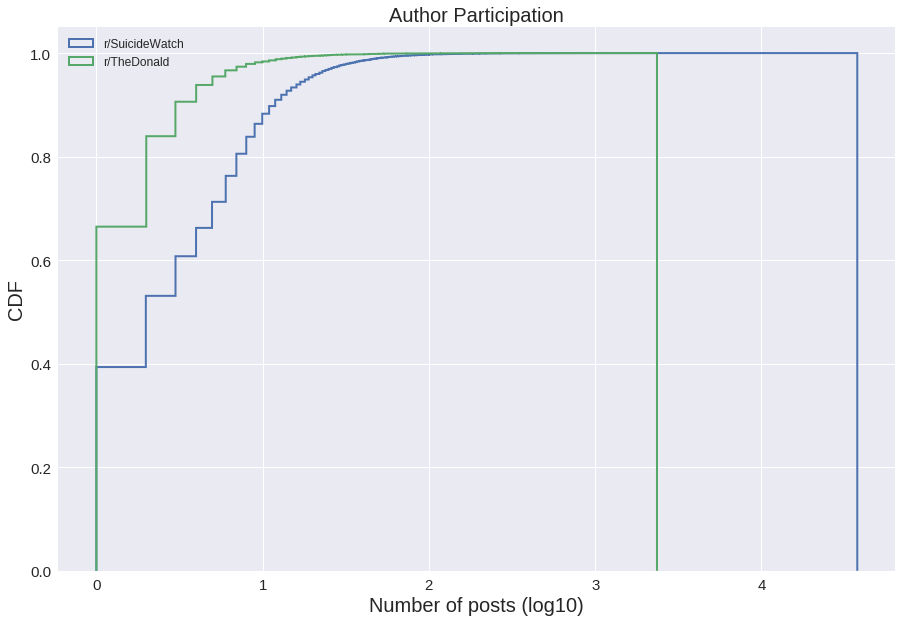

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(authCount_SW.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(authCount_BL.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Author Participation", fontsize = 20)
plt.xlabel("Number of posts (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch' , 'r/TheDonald'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [49]:
sortedAuths_SW = sorted(authCount_SW.items(), key=operator.itemgetter(1))

top1percent_SW = sortedAuths_SW[-(int(0.01*len(sortedAuths_SW))):-1]

top1percent_SW_auths = [k[0] for k in top1percent_SW]

print len(top1percent_SW_auths) , len(SW_mods)
print float(len(list(set(top1percent_SW_auths).intersection(set(SW_mods)))))/float(len(top1percent_SW))

309 12
0.0323624595469


In [50]:
sortedAuths_BL = sorted(authCount_BL.items(), key=operator.itemgetter(1))

top1percent_BL = sortedAuths_BL[-(int(0.01*len(sortedAuths_BL))):-1]

top1percent_BL_auths = [k[0] for k in top1percent_BL]

print len(top1percent_BL_auths) , len(AS_mods)
# print float(len(list(set(top1percent_BL_auths).intersection(set(AS_mods)))))/float(len(top1percent_BL))

95 2


In [51]:
allGraphs_BL[allGraphs_BL.keys()[19]].nodes(data=True)

[(u't1_dq2xr5z',
  {'affects': 97.58,
   'author': u'RobusEtCeleritas',
   'depth': 1,
   'downs': 0,
   'text': "I've had around six years of quantum-heavy courses between undergrad and graduate school.There are lots of good books out there on QFT. I like the one by Mandl and Shaw for a first course in QFT.",
   'time': 1511159887.0,
   'ups': 1}),
 (u't3_7e6byk',
  {'affects': 25.77,
   'author': u'FerrousBuchner',
   'depth': -1,
   'downs': 0,
   'text': 'I just saw a question like "what is the probability that an electron from the other side of the Earth is in my room. This made me wonder. AFAIK, an electron\'s probability distribution in space extends infinitely, but with an exponential decrease the further out you go. Does this not mean that an electron prepared in some localized state has a non-zero probability of traveling faster than the speed of light?The only way around this is if the probability distribution in space went to zero at some finite distance away, that is relat

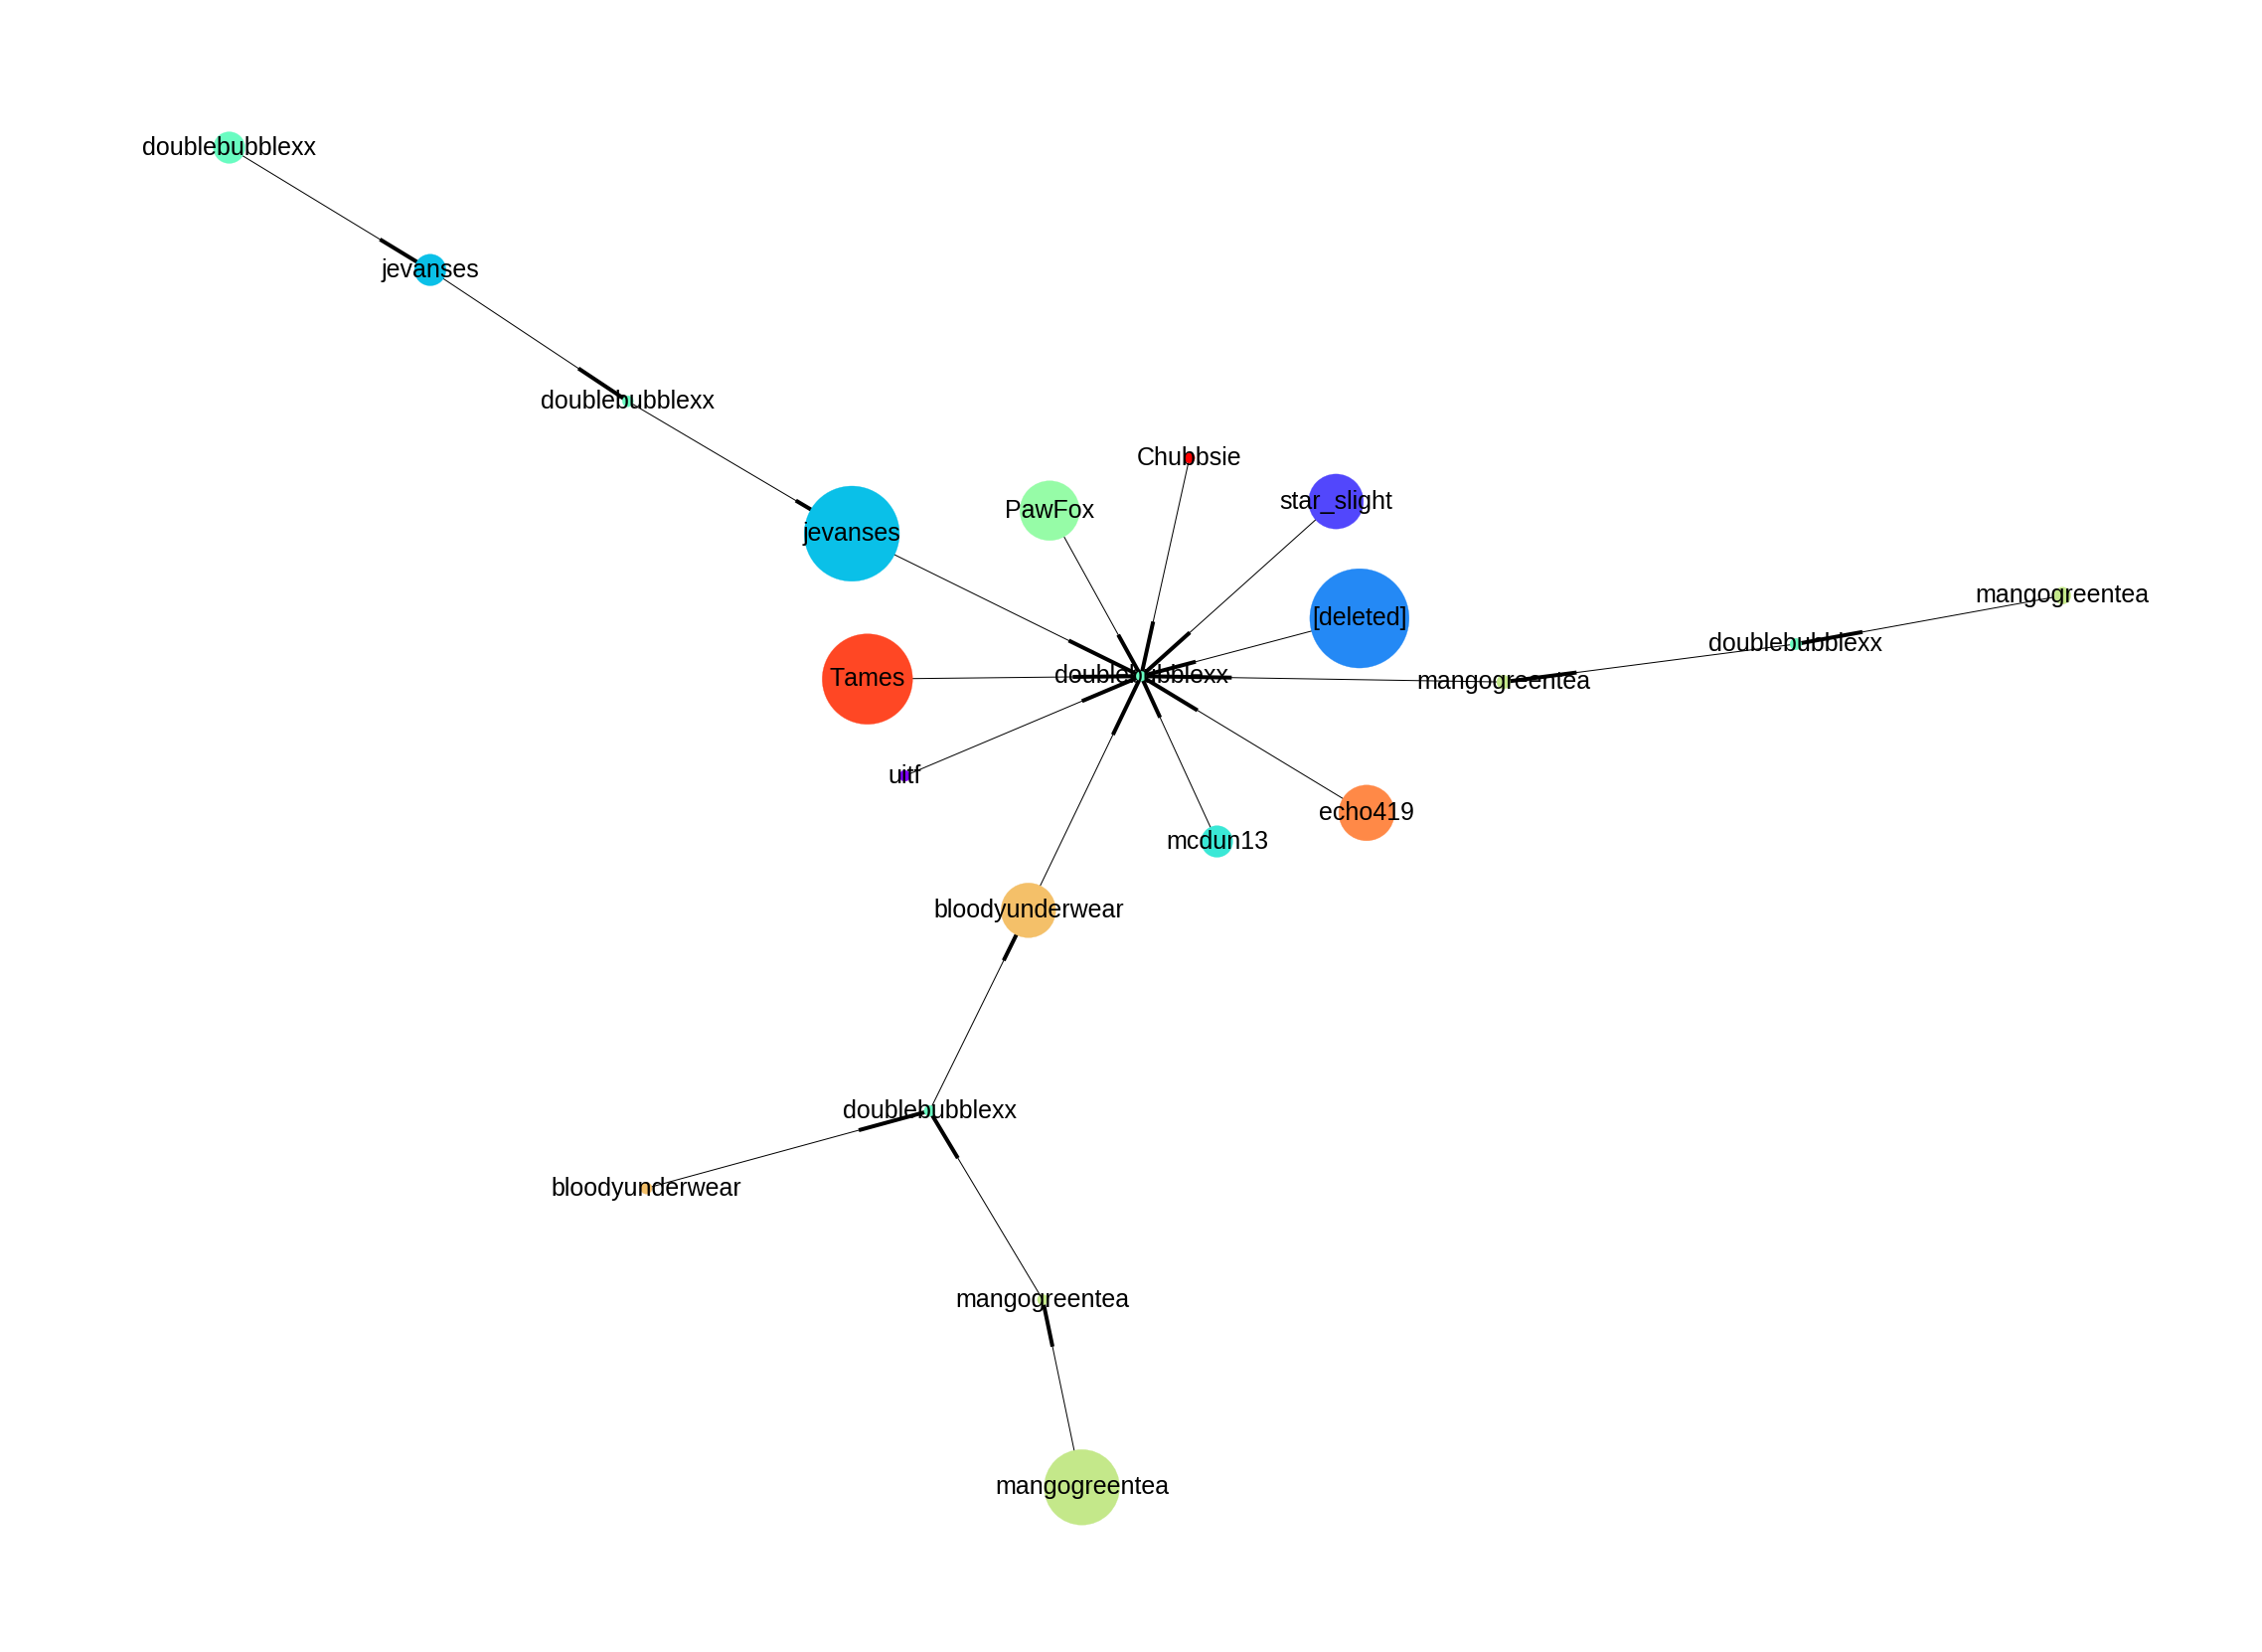

In [52]:
drawReplyGraph(allGraphs_SW[allGraphs_SW.keys()[15]])

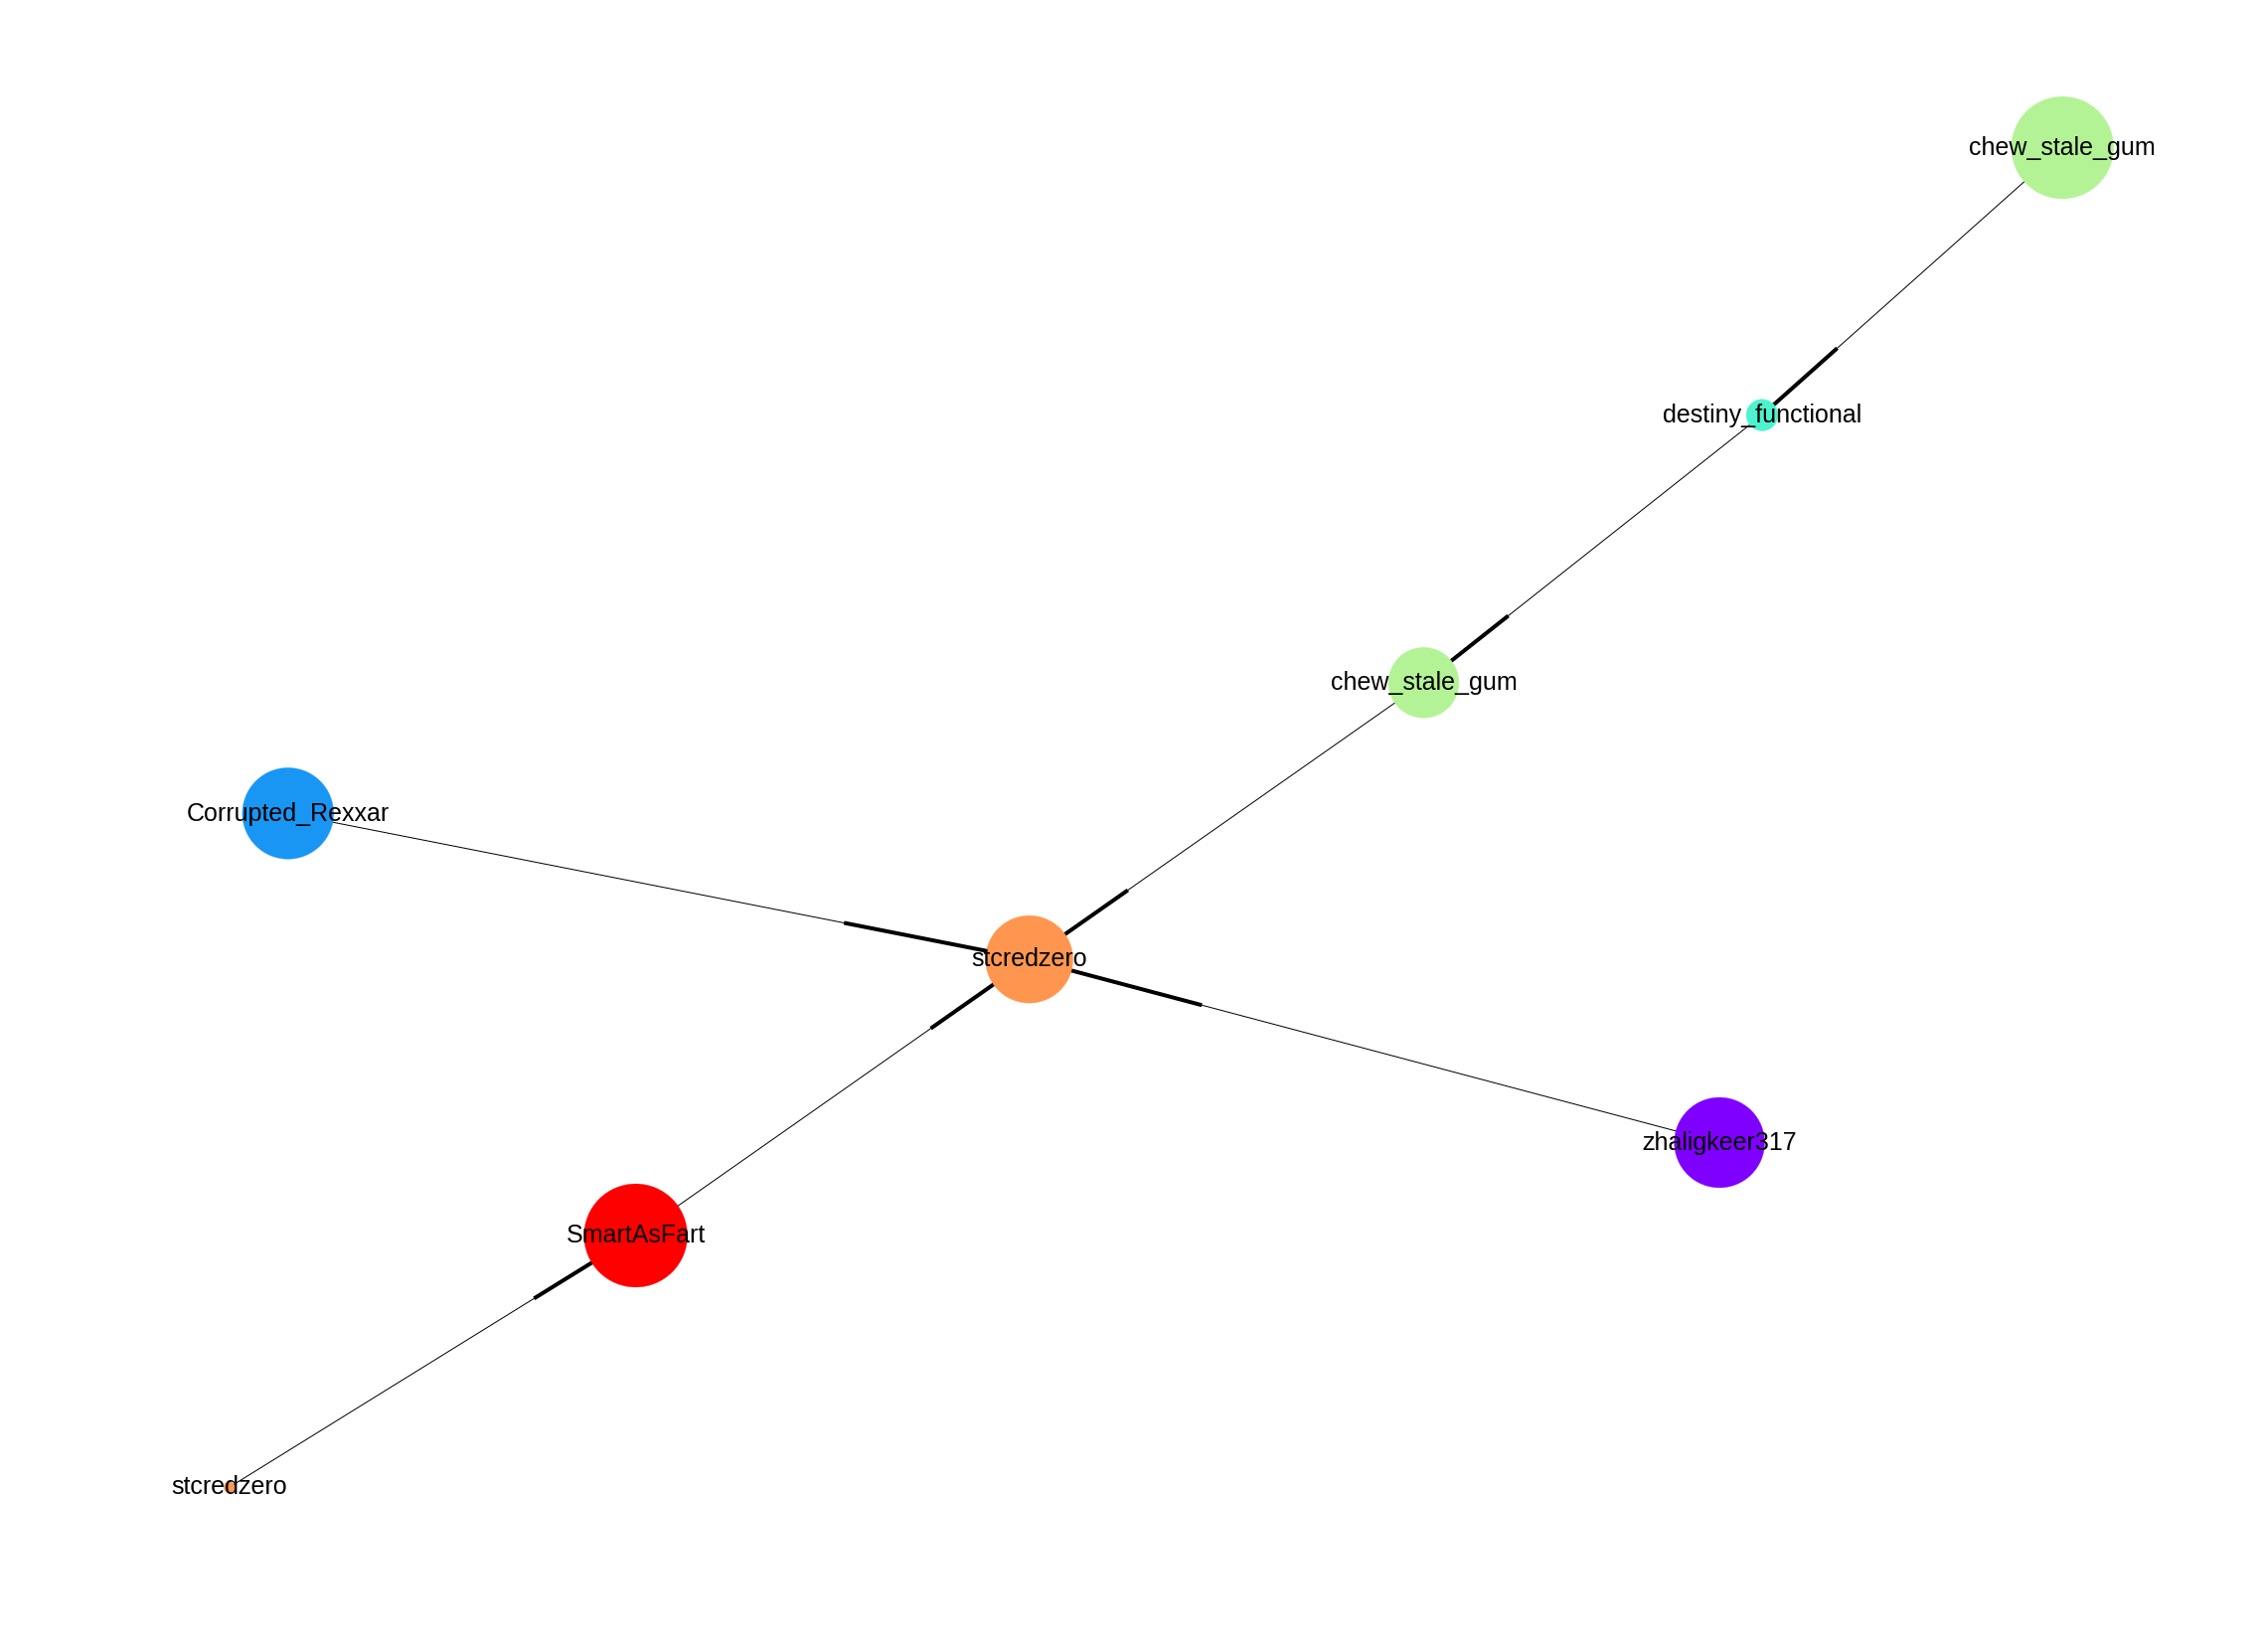

In [53]:
drawReplyGraph(allGraphs_BL[allGraphs_BL.keys()[150]])

In [54]:
userGraphs_SW = createUserGraphs(allGraphs_SW)

In [55]:
userGraphs_BL = createUserGraphs(allGraphs_BL)

In [56]:
print len(userGraphs_SW)

10157


In [57]:
#Save sampled USer Graphs: 
# with open("../Data/SW_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_SW)

6


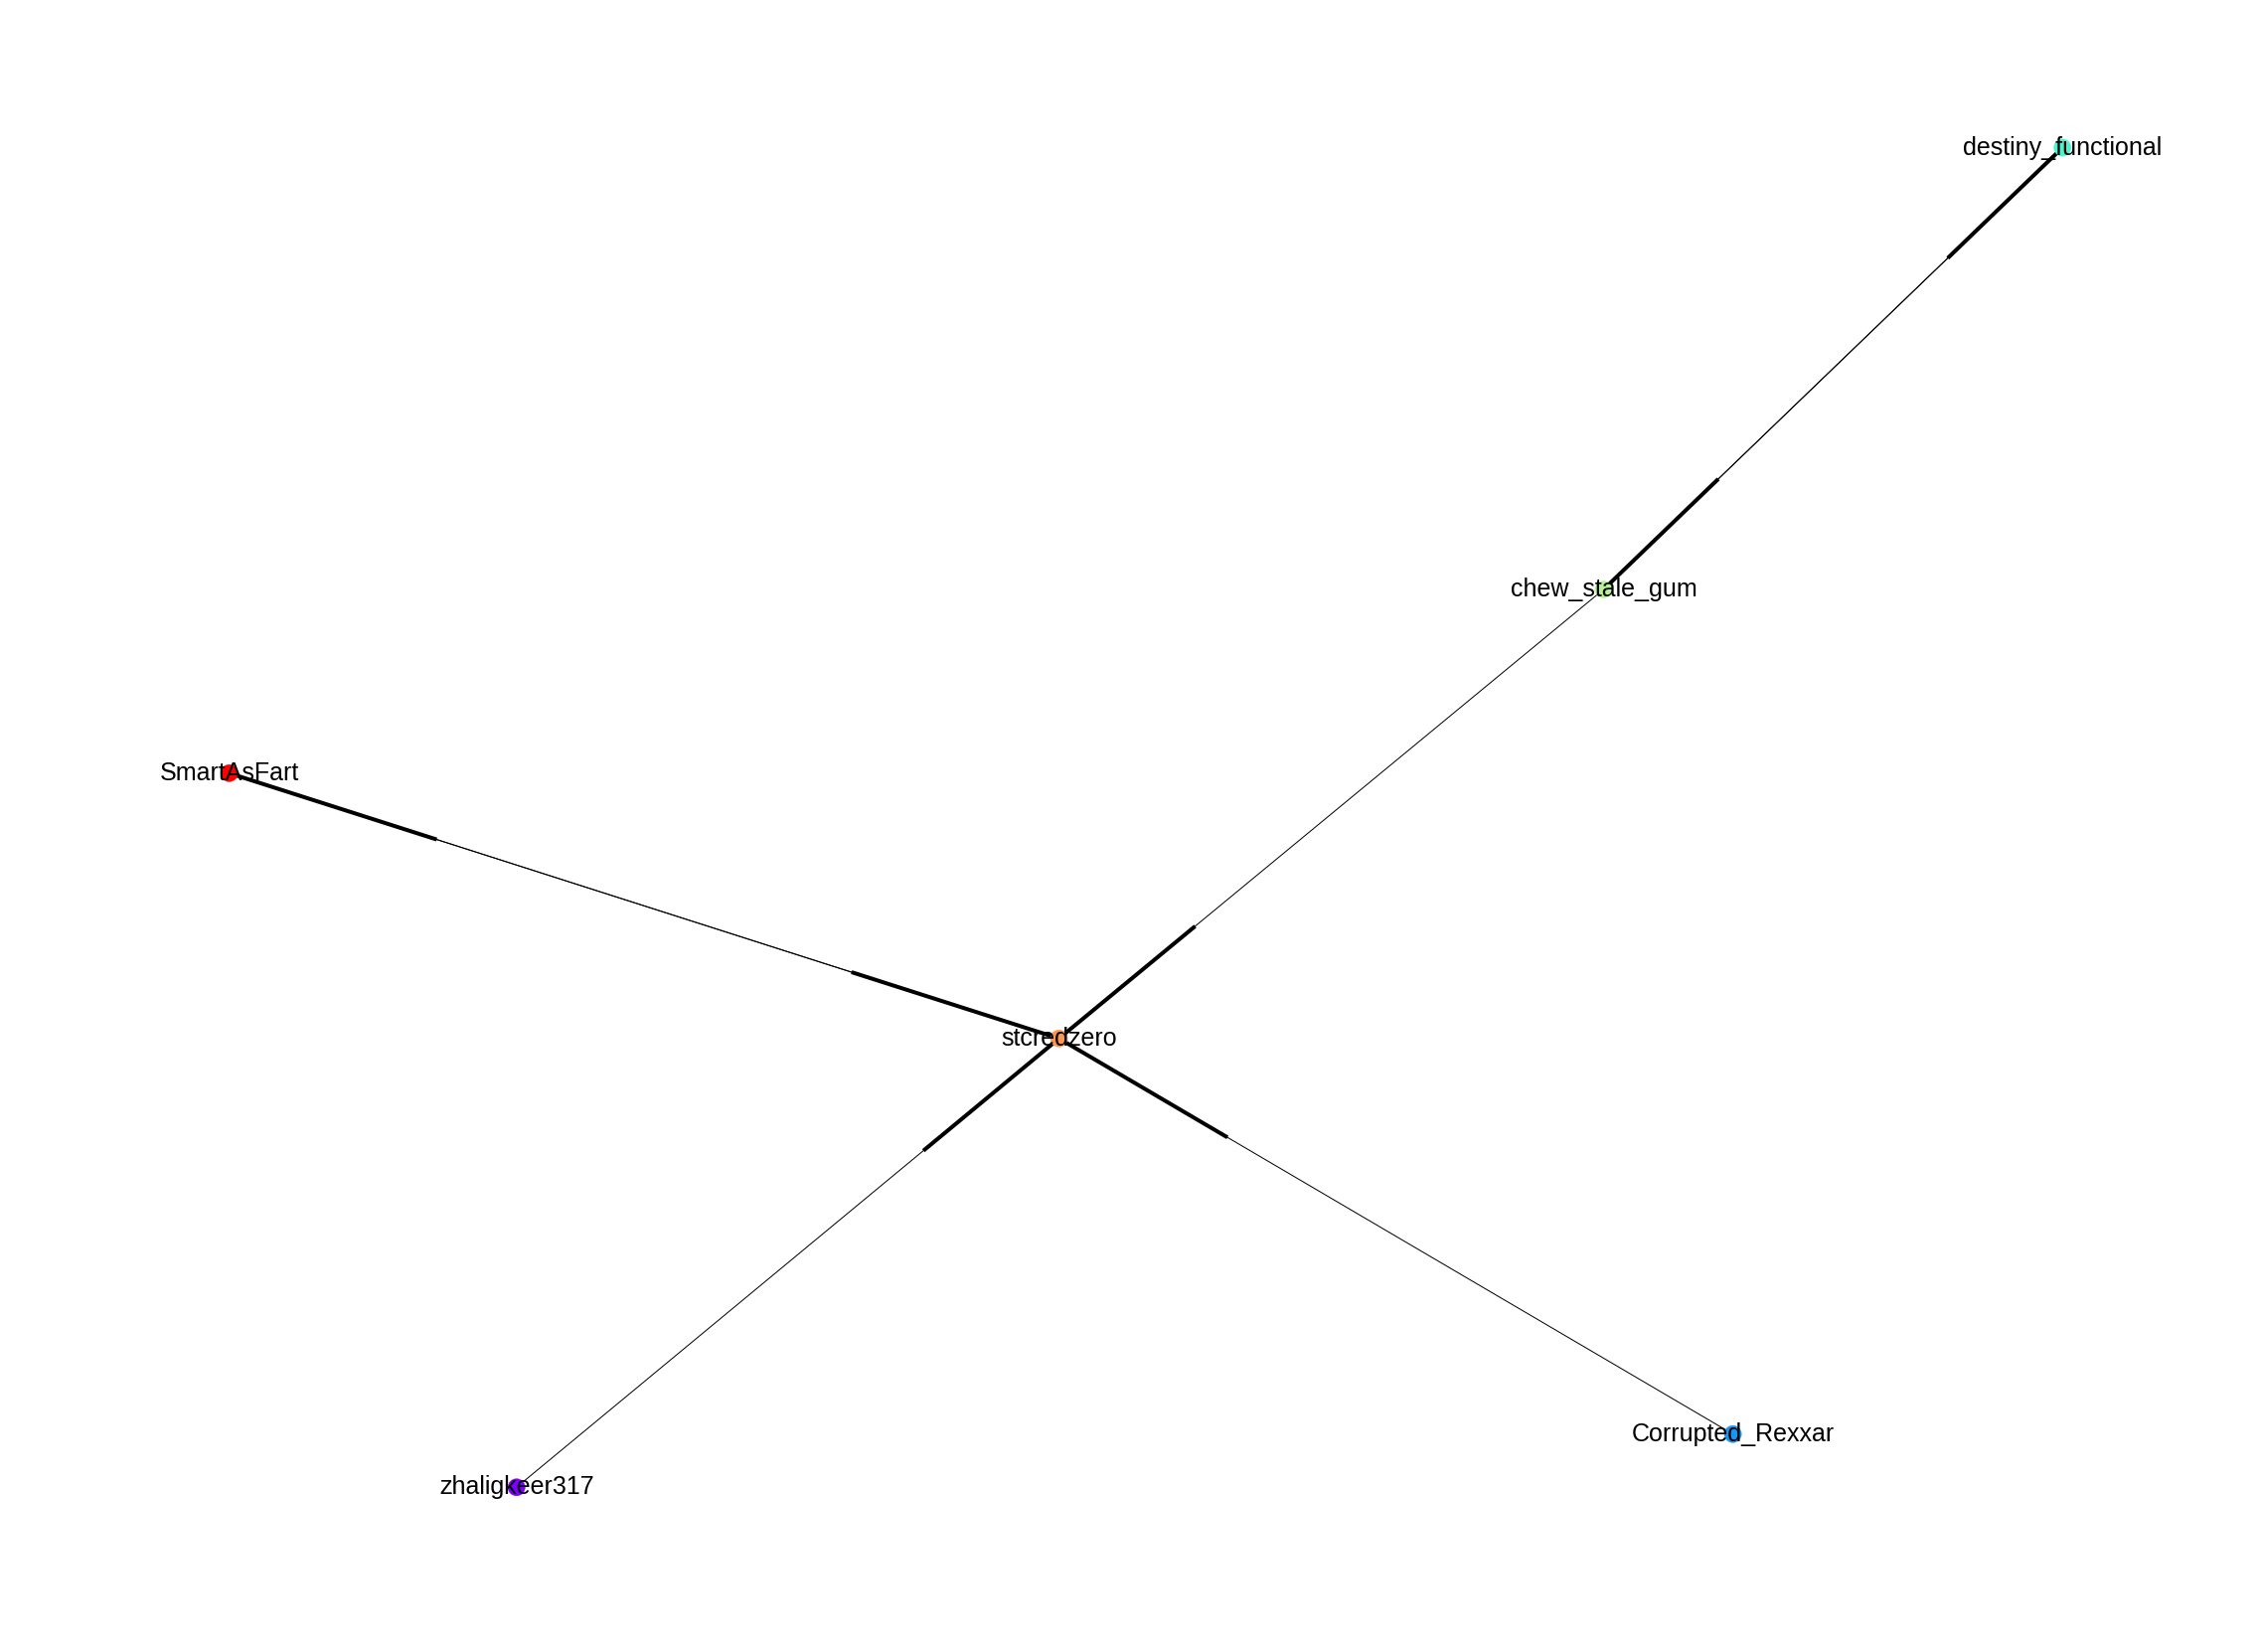

In [58]:
drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[150]])

12


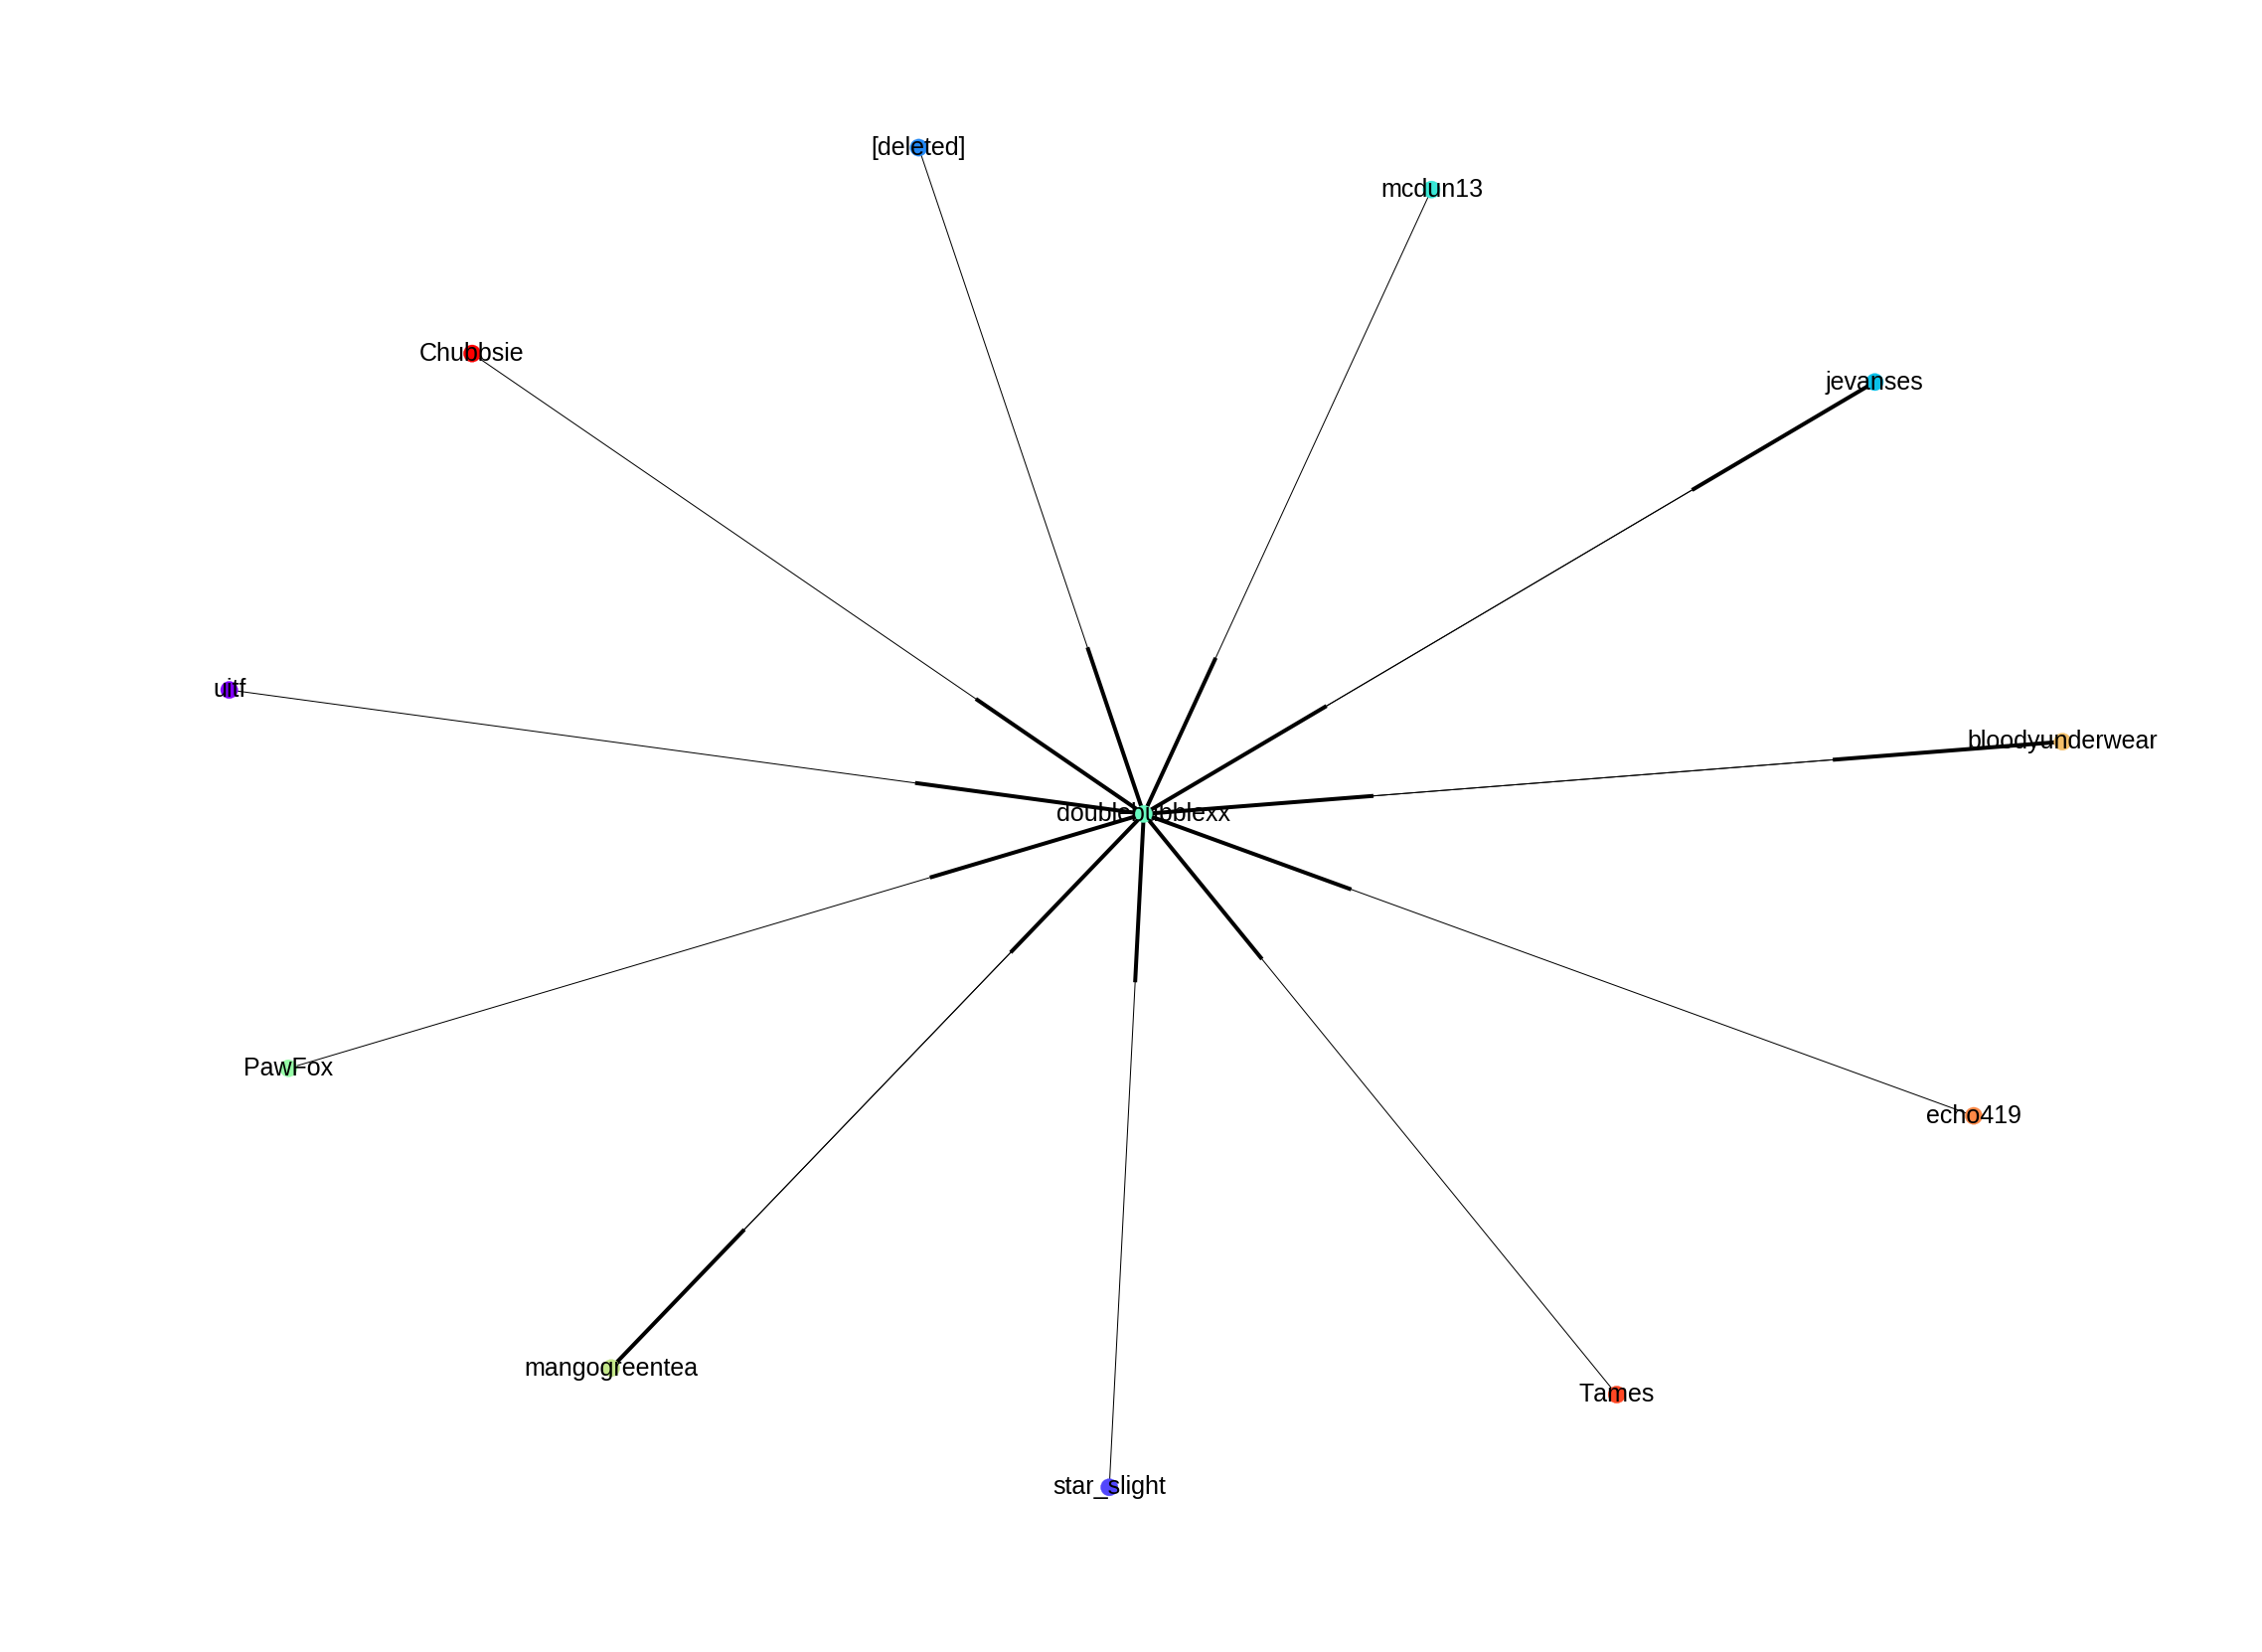

In [59]:
drawUserGraph(userGraphs_SW[allGraphs_SW.keys()[15]])

6


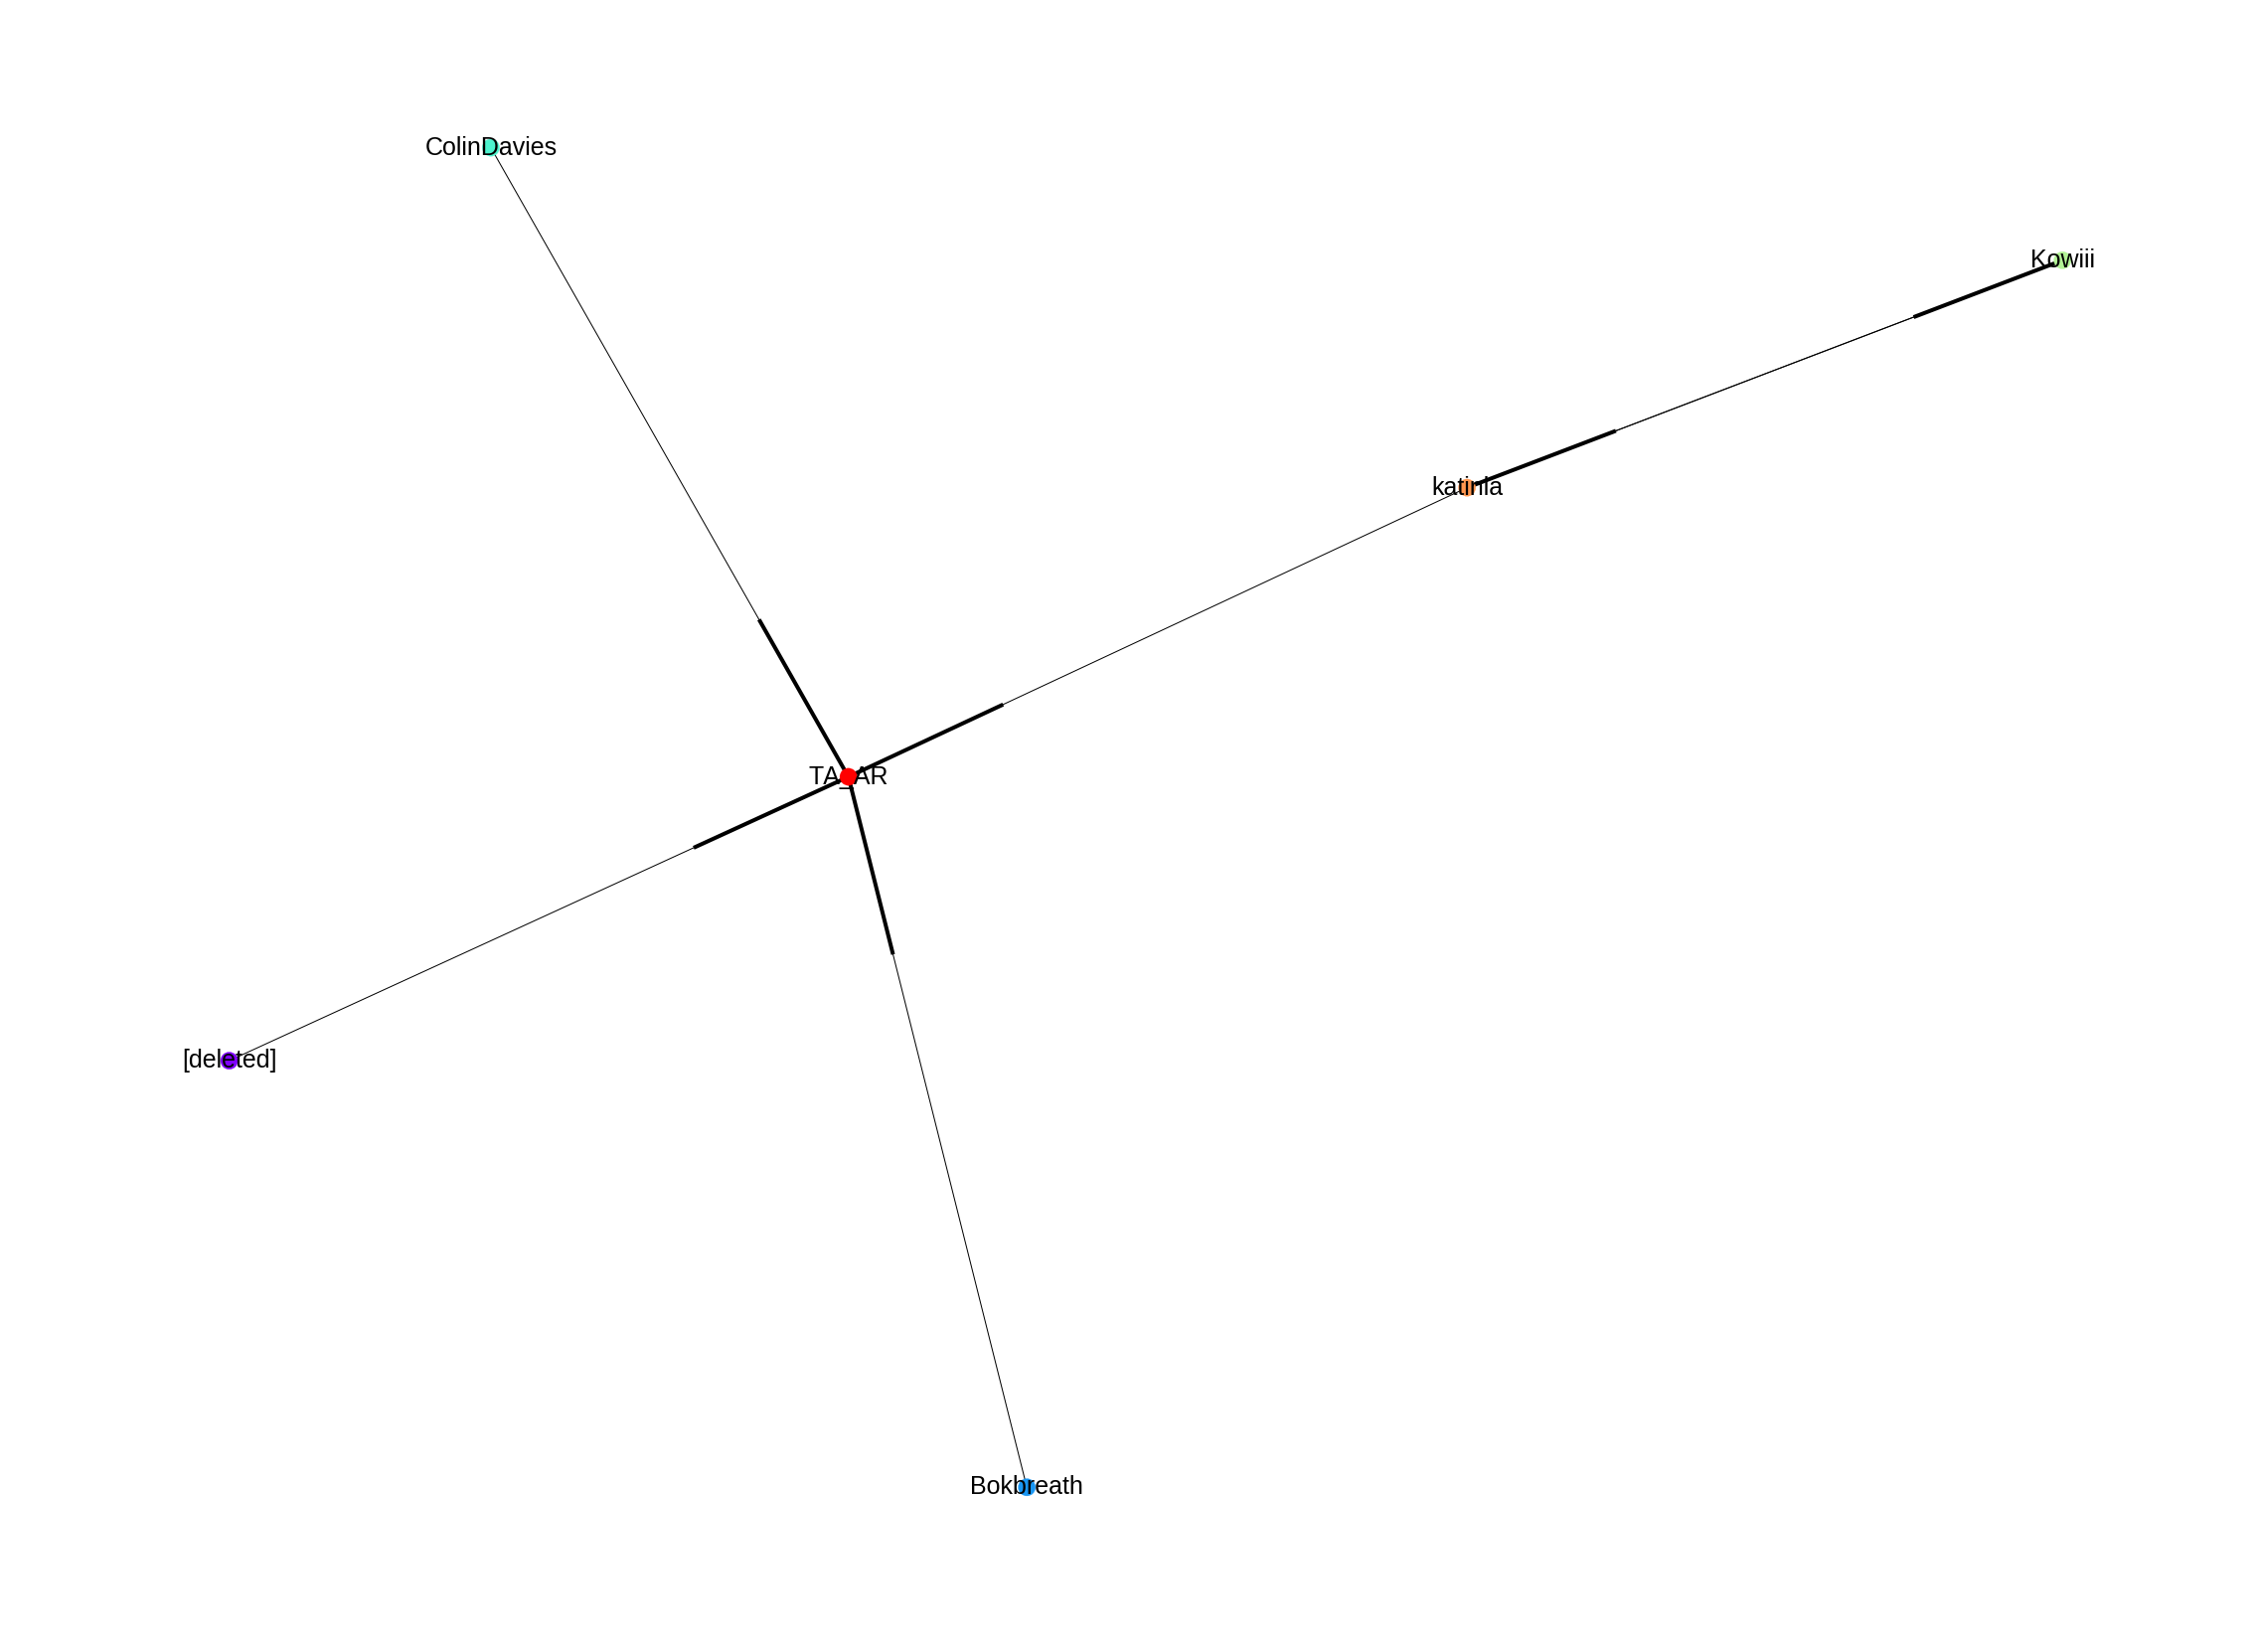

In [60]:
drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[1]])

In [61]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [62]:
opAuthors_SW = getRootauthors(allGraphs_SW)
opAuthors_BL = getRootauthors(allGraphs_BL)

In [63]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)

10157 10157
1001 1001


In [64]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW)

923 8053


In [65]:
sampled = random.sample(filteredUGraphs_SW.keys(),len(filteredUGraphs_BL))
print len(sampled)
sampledUgraphs_SW = {}
sampledReply_SW = {}
for k in sampled: 
    sampledUgraphs_SW[k] = filteredUGraphs_SW[k]
    sampledReply_SW[k] = allGraphs_SW[k]

923


In [66]:
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = allGraphs_BL[k]

In [67]:
len(sampledReply_SW) , len(sampledUgraphs_SW)

(923, 923)

In [68]:
#Save sampled USer Graphs: 
# with open("../Data/SW_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampledUgraphs_SW)
    

# with open("../Data/AS_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_BL)

In [69]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k] for k in depth]
    return depths
        

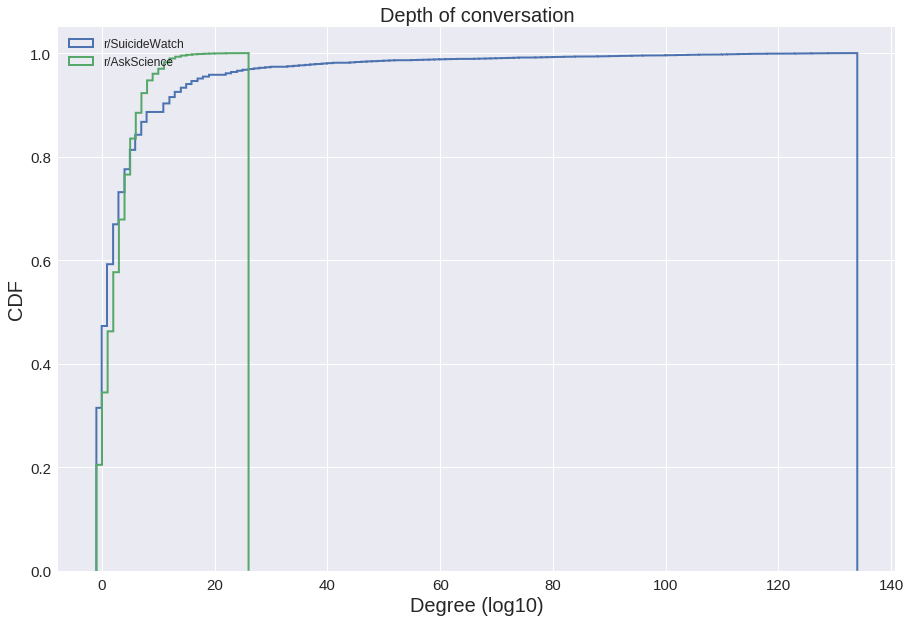

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(getDepths(sampledReply_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(getDepths(filteredReply_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Depth of conversation", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [71]:
from scipy.stats import mannwhitneyu
def findMannWhitney(vec1 , vec2):
    if len(vec1) > len(vec2):
        vec1 = random.sample(vec1 , len(vec2))
    elif len(vec2) > len(vec1): 
        vec2 = random.sample(vec2 , len(vec1))
    else:
        print "Samples are same size, no need to resample"
    statistic , pvalue = mannwhitneyu(vec1, vec2)
    return statistic, pvalue
        

In [72]:
print len(getDegreeDist(filteredReply_BL) ), len(getDegreeDist(sampledReply_SW))

stats , pvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(filteredReply_BL))
normstats , normpvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(sampledReply_SW))
print stats/normstats, pvalue

19025 19591
Samples are same size, no need to resample
0.843642351329 2.20645623877e-85


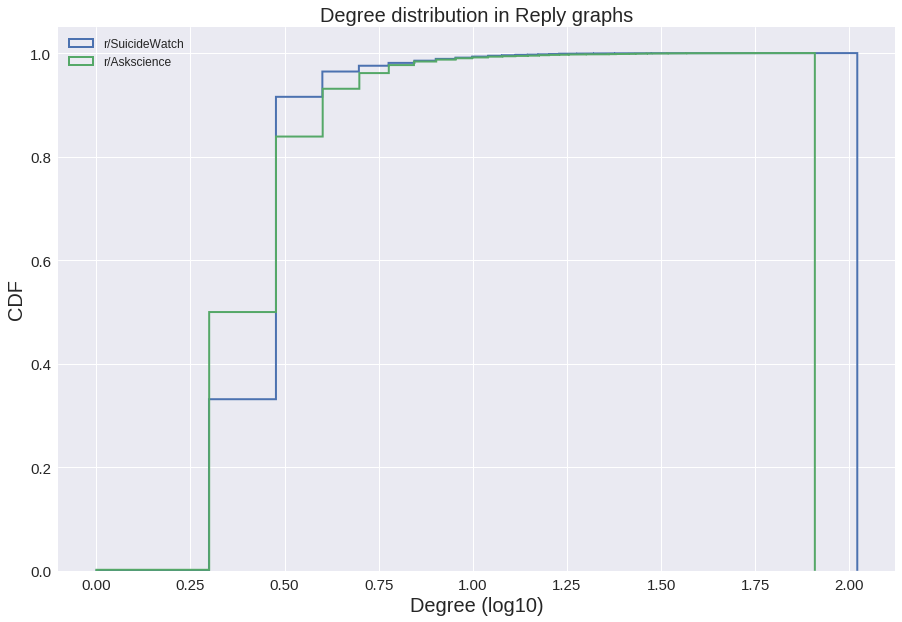

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in Reply graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/Askscience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

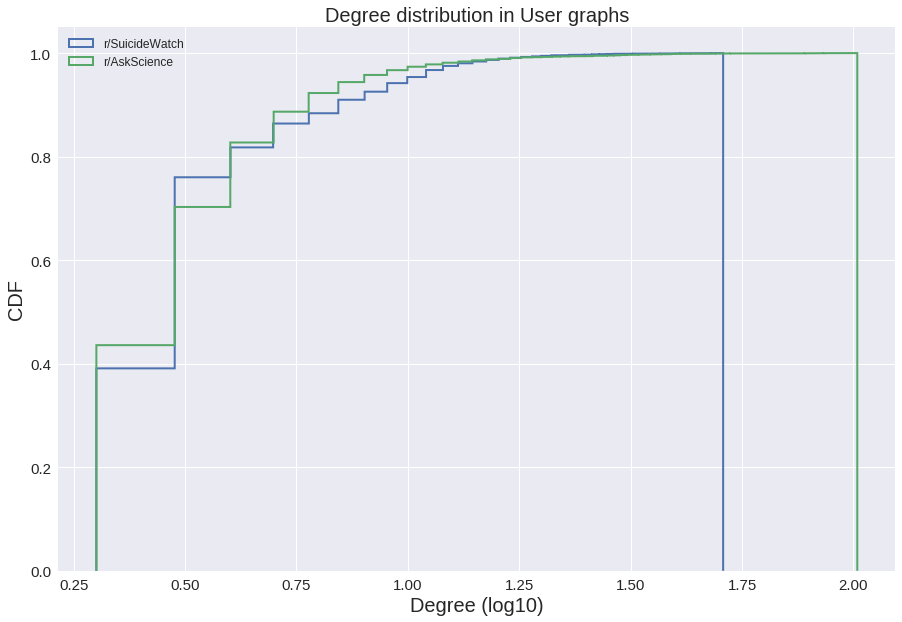

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledUgraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in User graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [75]:
print len(getDegreeDist(sampledUgraphs_SW) ), len(getDegreeDist(filteredUGraphs_BL))

stats , pvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(filteredReply_BL))
print stats , pvalue
normstats , normpvalue = findMannWhitney(getDegreeDist(sampledReply_SW) , getDegreeDist(sampledReply_SW))
print stats/normstats, pvalue

6291 11766
161867322.5 1.20360512763e-85
Samples are same size, no need to resample
0.843482291833 1.20360512763e-85


In [203]:
import operator

def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
                        print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getSymmetricOPResponses(replyGraphs , opAuthors):
    conversationChains = {}
    
    for k in replyGraphs:
        g = replyGraphs[k]
        authors = nx.get_node_attributes(g,'author')
        edges = g.edges()
        conversationChains[k] = {}
        conversationChains[k]['op'] = []
        conversationChains[k]['bp'] = []
        if opAuthors[k] == '[deleted]':
            continue
        for e in nx.dfs_edges(g):
            if k not in opAuthors:
                print "OP index not found"
                continue
            if e[1] not in authors or e[0] not in authors:
                print "Edge authors not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if g.node[e[1]]['text'] == '[deleted]':
                    continue
                conversationChains[k]['op'].append(g.node[e[1]])
                conversationChains[k]['bp'].append(g.node[e[0]])
    return conversationChains
                

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
                
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
#             if n not in authors:
#                 print "author not found" + n
#                 continue
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [77]:
allGraphs_SW[allGraphs_SW.keys()[1]].edges()

[(u't1_cely5zn', u't1_cely3ba'),
 (u't1_celyneb', u't1_celyhls'),
 (u't1_celzoe2', u't1_celyneb'),
 (u't1_ceslg49', u't1_cemtbqj'),
 (u't1_cemtbqj', u't1_cems1up'),
 (u't1_cely8h4', u't1_cely5zn'),
 (u't1_celyz24', u't1_celyneb'),
 (u't1_cely3ba', u't3_1uv2vj'),
 (u't1_celyhls', u't1_cely5zn'),
 (u't1_cems1up', u't1_celzoe2'),
 (u't1_cems27c', u't1_celyz24'),
 (u't1_cemzar2', u't3_1uv2vj'),
 (u't1_cemiid4', u't1_celyz24')]

In [78]:
# allGraphs_SW[allGraphs_SW.keys()[1]].node['t1_cb958j2']

In [79]:
convChainsSW = getSymmetricOPResponses(allGraphs_SW, opAuthors_SW)

Edge authors not found


In [80]:
# print convChainsSW

In [81]:
times = nx.get_node_attributes(sampledReply_SW[sampledReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1337170700.0


In [82]:
len(opAuthors_SW) , len(opAuthors_BL)

(10157, 1001)

In [83]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(sampledReply_SW,opAuthors_SW)

In [84]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

In [85]:
len(SW_OPSentiDiff)

564

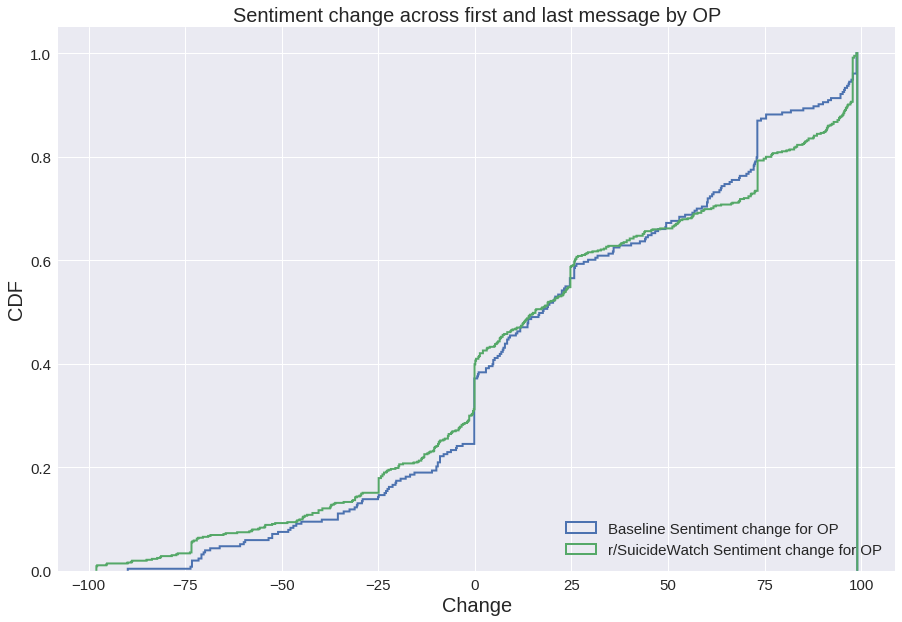

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [87]:
print len(BL_OPSentiDiff), len(SW_OPSentiDiff)

stats , pvalue = findMannWhitney(BL_OPSentiDiff , SW_OPSentiDiff)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_OPSentiDiff , BL_OPSentiDiff)
print stats/normstats, pvalue

253 564
30543.0 0.186924179428
Samples are same size, no need to resample
0.954334546704 0.186924179428


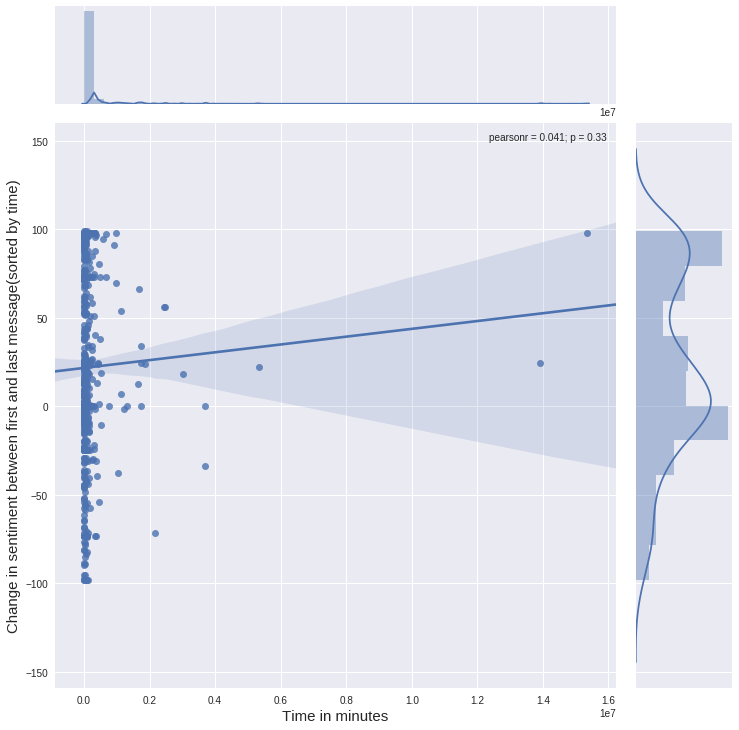

In [88]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [89]:
len(opAuthors_BL) , len(opAuthors_SW)

(1001, 10157)

In [181]:
opAuthors_SW['nfuo5']

u'other-user-name'

In [90]:
SW_timeDist = getTimeDistribution(sampledReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)

In [91]:
SW_AllTimeDist = getAllTimeDifferences(sampledReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)

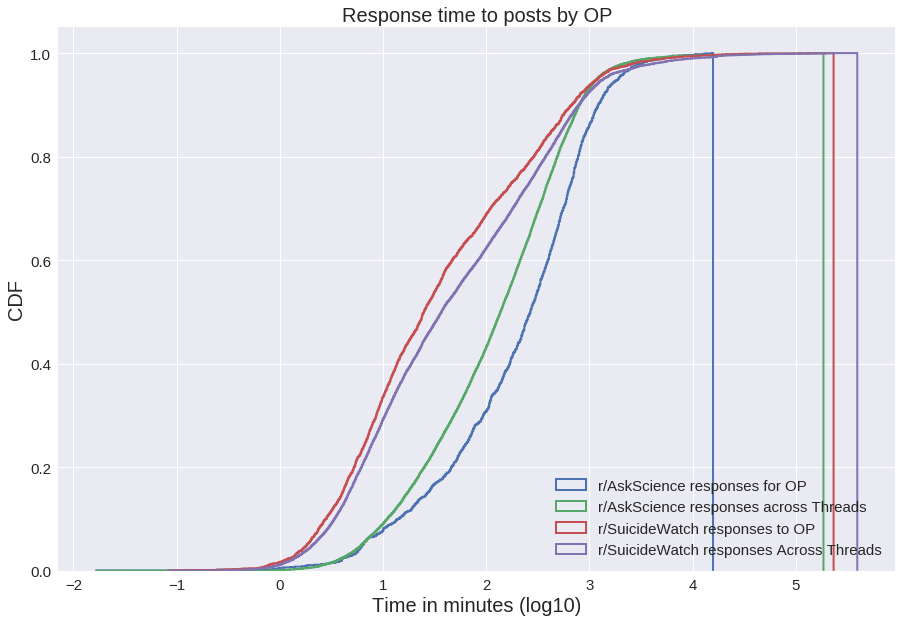

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience responses for OP', 'r/AskScience responses across Threads' , 'r/SuicideWatch responses to OP' , 'r/SuicideWatch responses Across Threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [204]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)


7i6343 NuclearJezuz atomfullerene
7ext3x Hitmonjet bluemuffin78
7ix0gj A_Dash_of_Time warm_kitchenette
7eyl3z mfb- goersen
7jm3c1 conservio wurly-curly
7i00pg PM_Me_Unpierced_Ears Aosih_
7fq8oy Shlkt mrterrbl
7g7chh The-Legend-26 ReallyMeNot
7g3uwv Wolfblader5657 iorgfeflkd
7e9zq2 Fe_man_ civiltongue
7e9zq2 Fe_man_ danby
7g4vjb NoNazis Gandalf-The-Fuscia
7gn4uu LjSpike cantgetno197
7fqc04 Svemirzuk TooFewChars
7h4ahd orangegluon here-for-karma
7dnurc UltimateAlgorithm Chad_bisceglia
7f7asj nogreatshakes CancerousChameleon17
7fst2c GelekW MasterFrost01
7fst2c GelekW mfb-
7hijsd destiny_functional cuicocha
7gkz3m IHateTexans cantgetno197
7io18w wonkey_monkey akambe
7e17ib shamdalar NotJordy
7fb1ed FriendlyCraig synapgorithm
7e1q8o Daddycynical69 kinyutaka
7gyk9p Quaildorf SharlBird
7dpk2q Astromike23 Aless_o14
7do1m9 monkeynose Rittermeister
7gex5z RobusEtCeleritas justalizardking
7dhxc8 Iroh_Koza 1096bimu
7hqtjm Forty__ datonedankmeme
7ep12w StardustSapien [deleted]
7exlm0 danby mfb-
7f

In [205]:
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(sampledUgraphs_SW,opAuthors_SW)

8msf1 gayguy [deleted]
8msf1 gayguy kanuk876
8msf1 gayguy MerEtAl
tp7e5 morethanconqueror friendless_ohwell
3hrnax TheFarm Doris033
fjatc drunk_otter dead_by_saturday
kuidx throwawaydepp Euolgy
1cbmdh dbt4949 SgtSlaughterEX
13gj6u PhoenixMagus nothanks_
1b0qhu whooopsydaisy magelanz
1b0qhu whooopsydaisy timbotunited
1b0qhu whooopsydaisy CABucky
1b0qhu whooopsydaisy [deleted]
1u02ae Illuminate_Obliviate KTcube
1u02ae Illuminate_Obliviate The_Quirky_Mariner
1u02ae Illuminate_Obliviate throwaway_away_away
2afxd5 Jessica-EdgeBlade youareanassmaggot
o762q Ayn_Rand_Was_Right endthatshit
10joja omnipotant hatefuldead
2kphhy RRyox JustAnotherHuuuman
zbf39 NicoleDaisy [deleted]
zbf39 NicoleDaisy VolatileChemical
zbf39 NicoleDaisy sleepingonstones
zbf39 NicoleDaisy krippykrip
2bkkno indistress1 FalconDickPunch
trlei -i-i-i-i-i-i- yellowroze
trlei -i-i-i-i-i-i- kobayashimaru13
22gqxt so_you Sooner-or-later
36i0ar Valserker teemoiscute
24gto5 Soletrador youcaughtthelight
wfm2l PickleyDickley [dele

19afyr omnipotant sxfe
3codse TheGamingLollipop [deleted]
3codse TheGamingLollipop cheecheongfan
1vbkyg howdoyoudothis1 I__Care
86ezy Buttercup50 lonelystar
1noqrt 559airandtrees corjine
1s83k2 dontletmethink cliffsofinsanity
1s83k2 dontletmethink [deleted]
2bn3ju veganiq overtime_vulture
3b0aam 0root [deleted]
1a7be5 Throwaway_Dave Morcian
1a7be5 Throwaway_Dave [deleted]
1a7be5 Throwaway_Dave MonoKong
2nsgp2 sofuckingstressedout [deleted]
2nsgp2 sofuckingstressedout portalily
2nsgp2 sofuckingstressedout Free-Hugs
2nsgp2 sofuckingstressedout -ThePanda
2nsgp2 sofuckingstressedout rdiaz022
2nsgp2 sofuckingstressedout throwaway87843556
2nsgp2 sofuckingstressedout Terex80
2nsgp2 sofuckingstressedout Moreoptionsplease
2nsgp2 sofuckingstressedout stealer0517
2nsgp2 sofuckingstressedout rrrant
2nsgp2 sofuckingstressedout constant_flux
2nsgp2 sofuckingstressedout jb275
sau07 beatnikbillygoat ThatStranger
33ben9 Fuyona pc14
2b4k9s mtftranstemp lilsunnybee
1ynjf3 ellindrosa copen3
1ynjf3 ellindr

In [206]:
SW_messageParti_all , SW_userParti_all, SW_bpusers_all = getSymmetricBehaviour(userGraphs_SW,opAuthors_SW)

vj5co [deleted] zombiemeds
fjatc drunk_otter dead_by_saturday
1x6boy Altruizzy throwawayacct424
97akw Faustyna [deleted]
97akw Faustyna PossiblePerson
3ci391 [deleted] peanutpeepz
s79sc logospogos284 fuck_usernames123
2tjz9s yolomgwtf BearDidIt
b0mvj lurkergirl itisover
ci9lz Agnostix dontwannabehere
24gto5 Soletrador youcaughtthelight
29en0c LostInAPicture Ingvarkarlsson
29en0c LostInAPicture throwawaybcirl
37zjrf the_wheaty pathfinder89
1cz1sd RemFrank KimmyJongJong
2wo3jj neminemexcusat throwitbitch1
1h1vqu [deleted] nopointnow
1h1vqu [deleted] rainbowtwinkies
16hiex chooby3000 griffin_desantos
e1hjc drqxx [deleted]
osxp1 no1one bleepitybleep
osxp1 no1one [deleted]
osxp1 no1one skekze
2kpspy [deleted] bktolife
2kpspy [deleted] Hasherss
2kpspy [deleted] Starship_Fighter
2at60d [deleted] Jessica-EdgeBlade
1p4pqm [deleted] TMRobotic
2hip0u Chaos_apple Missing_love
xwu8q blondin 1800HEYGTFO
1dqizr ta001001 buba_fett
1jg4bt blipsycat dudelikeshismusic
1jg4bt blipsycat [deleted]
e6utj dsw

axqrz nonamejoe RobSpewack
2ij5ah is_throaway [deleted]
2o0gzp Gravitron34 [deleted]
1zunnf [deleted] PlushNunchuck
1a5q2f CTRMYS ringsnmodules
ig7et pacg Throwaway7756353
2bftt0 wrcmdsaul [deleted]
2bftt0 wrcmdsaul 12awr
2bftt0 wrcmdsaul Neddy93
u8jte htnsaoeu selonnan
3ghqgr erasse11 melusine00
1zfx8u reaching-out thefinalthrow
1gpza8 [deleted] efgrhrehertgwrf
gvb0g ihaveacalculator [deleted]
20m7ec ClumsyPenguin altacct3
1c6b52 rizzie_ byebyelater
1rt43f [deleted] goodbyeall_
370znr Mikeyroses [deleted]
2sg4ef fogwebs [deleted]
2sg4ef fogwebs jacobmcilravey
2sg4ef fogwebs tg40
2sg4ef fogwebs gogofuckio
2imoxg [deleted] redditreviewer
2nwo3f [deleted] -_--__--__
fbks9 hotelstuckthrowaway gimpwiz
fbks9 hotelstuckthrowaway answersquestion
196ehz [deleted] swthrowaway12
1c7gnl Yeakermiester lylli88
djtwx DeadPrez sashalionheart
1nupcv i-wear-hats Bandrea
1nupcv i-wear-hats [deleted]
2jnt99 HeyGirl90 frohedadrine
2jnt99 HeyGirl90 c9h7
2jnt99 HeyGirl90 Tellmesomethinggood1
22rbsi Throwawa

14asey tainted_dreams allemont
1fwjis [deleted] horrorable
1fwjis [deleted] keeperoftheworld
2hna2u TwistedPerception secondarywords
1hyfba terrifiedfuckfuckdon [deleted]
1hyfba terrifiedfuckfuckdon diabuddha
2p31ch tamoosh63 [deleted]
2p31ch tamoosh63 yellowroze
1tit6w SQLwitch Noscream
2lg62c dprssthrowaway TheEpicGlitch
2ergw4 MyJustMeHere confusedjake
2ergw4 MyJustMeHere HipNHap1
2sy7bs feeling_groovy alexsc12
14vy3k bambulance abc132
1r1o2d [deleted] ClaranceWhirly
9pddy [deleted] willwaitforever
22xakd PoptartsRShit Poptart_Muncher
14ywrp [deleted] littleXmissXwolfyX
zojtv Varriable sl1mz
phmde i_am_not_a_liar WeAreNotWhoWeAre
1t1rer IliketurtlesALOT unstressed
7yv16 karmadillo freakball
fg64q Panda_Patrol kalculator12
371ah5 JoylessNothing Opticks1704
371ah5 JoylessNothing freshcherries
371ah5 JoylessNothing thenightsky_z
2bmnze [deleted] Raven_Sage
12umtk [deleted] RAGE-RAGE-RAGE
c6vd9 bfalava [deleted]
2udymv [deleted] sweet_delia
2afxd5 Jessica-EdgeBlade youareanassmaggot
29g

29r9sg droidkopter iownannes
29r9sg droidkopter Jessica-EdgeBlade
2oftmg [deleted] createanewaccountuse
10efej [deleted] noliesjustlove2
1i972q MarginOfError englishmight
1i972q MarginOfError itsbillymazebitch
1i972q MarginOfError CricketPinata
az1nc [deleted] IsaacNewton1643
20oiic ja18960 [deleted]
20oiic ja18960 ADeafBlindMute
1hrkl4 imscrewed2 unknownthingamabob
19dbql xHoNNy7 SWatchThrowaway
18uyw8 magelanz OperationRepost
rtcc6 CultZero hello_angel
2tt4iu Jonnie_S [deleted]
2tt4iu Jonnie_S ja18960
2xbaia TheEarlShibe supermassivemuser1
vajy7 833833 LostCause_TV
16uav2 jaywarbs not_sure_why_im_here
1lqaq7 helpneeded666 [deleted]
1lqaq7 helpneeded666 tanandblack
2g5sa0 UnKamenRider ineedhelpplease5
qrxlj [deleted] gta1989
11dxoe [deleted] secretjournal
2xw340 TheDeadbeatOfLife [deleted]
11i8yu mylifeisruined a5throwaway
11i8yu mylifeisruined exgiexpcv
2sho1k jrz1987 [deleted]
1c945x palawoman throwaway527873
njlc9 girlgirlheyugogirl angryoung_man
1x1llv kk_toxicc12 SocietyExcess
11

ddqs5 Glayden missingme
ddqs5 Glayden Huaua13
dsjod Warlizard whatamisupposedtodo
14k46r derpingon hghghghghghghghg
3c6dgk sirpapsalot [deleted]
10xxjq [deleted] Fapple_iFap
nu84e razorbit electron_beam
d758a len69 airmandan
2y8jku [deleted] hatemyselfso
1tek22 sofar1776 throwaway89025
2vl9t0 taylor-in-progress GQuestioningThrowAwy
tm9y1 deathisdestiny altimalove
16xak1 [deleted] throwmyselfaway11
vewop HaveFaithxInMe itschrome
1fowts b4xt3r thismightbetheend
1zvgf7 Coolbeanz7 Taintedgod
1prn0e Temporary_Account_1 mfanyafujo
1prn0e Temporary_Account_1 hammerfreuds
3curbb [deleted] bigbadbiggie666
3curbb [deleted] arkmabat
10nvzw [deleted] someoneneedinghelp
jveo4 Gfresh404 AnonymousRainbow
jveo4 Gfresh404 TerrordactylYOU
1jr8uf ColdRain ExUnoPlures
2958kq [deleted] berliniloveyou
es8w1 UsernameV2 Psy-Kosh
es8w1 UsernameV2 red_foot
es8w1 UsernameV2 [deleted]
1t4okv newnia RegularParadox
3ce4yd cyathea helpmeminor
2uepj2 ironsoul412 _Oisin
2uepj2 ironsoul412 pyrocheetah
hikf3 treemugger 

2aw7ei [deleted] poorexcuseofaperson
2n5kn9 MokkaStoneCo turkishpresident
t1d4f throway971nw beigelightning
t1d4f throway971nw NinjaDiscoJesus
n1ojh sandangel Bleep_Bleep
tuskb Calimhero blondin
1hl6f6 Ginger_spice22 [deleted]
1hl6f6 Ginger_spice22 popNfresh91
ojr21 Fucklifethrowaway [deleted]
ojr21 Fucklifethrowaway Reordin
2m161t Depressed3737731 [deleted]
2upj14 skyrimskyrim [deleted]
3dgbzg [deleted] EllietheWalrus
peima a_whiskey Thehiddenlittlegirl
35ylua kid775 [deleted]
2bkhwy throw_away_account94 [deleted]
1egcrt milkyj Unconfidence
1j8j21 Donny_Brook disablednojob
w6ozt unclefunks onelastshotTA
1s2lri throwaway18482 Hellkyte
1s2lri throwaway18482 exgiexpcv
kbzdv [deleted] uivengp
106byo Guyon thingsdontgetbetter
oduvv [deleted] isagooddaytodie
1dtbz7 Eminemshrty ImTooScared
1maewh chupacabra_whiskey veryPanicked
1maewh chupacabra_whiskey southernmiss
2p7t2u haalidoodi Moron_Throwaway
1v8x5k Hikcory19 [deleted]
25idae IwasTheLaw [deleted]
25idae IwasTheLaw Doc_Jubs
e2ewl [dele

368cty Moo_Moo_Cows [deleted]
368cty Moo_Moo_Cows ZachLNR
368cty Moo_Moo_Cows TheSanityInspector
368cty Moo_Moo_Cows Pongpianskul
2w3lqi [deleted] janinefour
1pys54 catchitwhen WantedDead
1pys54 catchitwhen [deleted]
1pys54 catchitwhen whiteoaksink
2avyvn _Tarsier_ Glitcl-l
ip974 [deleted] nonexistance
2tdcbv [deleted] DntWorryAboutThisGuy
2tdcbv [deleted] AngryhamLincoln
2tdcbv [deleted] the_wandering_nerd
nbm0t failureinmylife [deleted]
nbm0t failureinmylife Psy-Kosh
aa2iz onemorestudent itsfakenameyouknow
14gkex Chorizzo sadiddy
s3khj mysadpony [deleted]
19v47n i_am_not_a_liar xDawnFangX
ri697 familyghost i_give_up_on_life
19053f Durkhelek brown_f
2jkdel xXxBluESkiTtlExXx FurryPineapplePizza
14gycn songsearcher FearIess
14gycn songsearcher gogopaddy
hstyc [deleted] dontwantthisanymore
2a4xq9 gargoyls LordViren
2p2rgs [deleted] jrz1987
2p2rgs [deleted] Shibezilla
2p2rgs [deleted] buttonholepleasures
2p2rgs [deleted] TheQuietOne
2p2rgs [deleted] zakattakk
2p2rgs [deleted] ThisIsDennis

1jajif ThisIsTheEnd221 ilovecars1987
1jajif ThisIsTheEnd221 Tlk2ThePost
e2fvj [deleted] tossaway23
1dwbdo serenamarie08 blackholeOfSadness1
12bu0x swthrowawy Epicman93
12bu0x swthrowawy frenchypadenchy
34u9vz BacontheGunslinger Recyclebinhero
pacrs A_Message_Of_Hope whatisgoingon99
1rtw7y mlnws ProbablyTonight
87tlg aenea nonlinkable
87tlg aenea defrost
354lls Jesta_lurker Jon_Brolo
1ylb5m SW_ag Dark-Depart
1ylb5m SW_ag Mythrowawaywheee
1ylb5m SW_ag Altruizzy
1ylb5m SW_ag thugl1f3
3i5iy0 Azgurath iexisted
miqi6 [deleted] semajmcneill
2nxbu3 G_r_cade Theonlyway94
3hs2ko [deleted] Dexley
mnnce AdrianHD whatstherumpus
2tfg03 lofilofilofianalog SQLwitch
2nswfs Sheesha1992 throwawaysandw
2jgzme mario0102 to--be--deleted
2lktbm Standardw waytootiredthrowaway
fg9h2 [deleted] ninjachan16
32ax1u JeffTheeKing 7629ThrowAway
30zi0u porwigle [deleted]
30zi0u porwigle helpwithallthings
30zi0u porwigle cmcl
2dtr9m fdggerge [deleted]
2dtr9m fdggerge bohler73
2dtr9m fdggerge Notinthefaceplease1
fn949 v

2ok9d2 1mnth2go Farun963
2ok9d2 1mnth2go whatdo99
2ok9d2 1mnth2go Ghd80
2ok9d2 1mnth2go LaochRedemption
2ok9d2 1mnth2go dbt4949
2ok9d2 1mnth2go barjonah
2ok9d2 1mnth2go anal_sacculitis
2ok9d2 1mnth2go clhydro
2pc100 CharlieMayhem Whitneh
2pc100 CharlieMayhem lumbarmoose
3cihp2 D00maGedd0n [deleted]
lqmdq [deleted] nomorejoy
1gzuhj pseudojewboy AbusedPenguin
1gzuhj pseudojewboy verkohlen
rx7in Suiatsu i_am_not_a_liar
rx7in Suiatsu NilSolidum
1ea3nn [deleted] KindOfPly
1ea3nn [deleted] Cappunan
1yibj1 scaredoftigers wholleypoet
3avpts Cuppaly bigbadbiggie666
1dj4ze failingandfalling Bleevl
tfhyu BLDBLDBLDBLD Bricked1234
fl22l Kalynada SkullFuckABaby
e3rj1 acepincter RespectfullyDisagre
g1os4 [deleted] SphericalBovinae
28nitv Elurzz88 princess_hulk
2snrrf salsa9912 EllietheWalrus
2snrrf salsa9912 lachyjim
2iik87 [deleted] CeciliaLisbon
29m9qe throwaway343434334 [deleted]
2q9m3p Terex80 [deleted]
93czd [deleted] keakealani
217jxj crashusmaximus SQLwitch
2136k7 mollywog94 fartsforrevenge
r3

a2l3g loser16 RoundSparrow
26tnhs VisualNoiz throwaway983507
17j796 Devyy93 stripedytiger
17j796 Devyy93 CarnivorousMoth
17j796 Devyy93 Gothric2707
17j796 Devyy93 MrPepper7
17j796 Devyy93 [deleted]
17j796 Devyy93 dbt4949
wwfza kohan69 accidentallyraped
129lbu [deleted] cabbagebutts
rb7wl Throwitaway899 [deleted]
rb7wl Throwitaway899 OIP
1ct7m7 txroller Suicideation
q8h7j [deleted] eliotmc
1vszkt brutallybipolar BruceWayneIsBarman
18kf6n haxel367 meow_thug
18kf6n haxel367 offlightsedge
dqzdv losercantdance SWthrownaway3
1jxyfh copsarebastards PoughkeepsieMan94
2a1785 hornless_unicorn_ ThrowawayForRosemary
s39uz logospogos284 jnhmltn
28oklt [deleted] suicideDenver
v327q thismaynothelp linne147
sozxg smdforathrowaway throwawaydeathh
189w0w [deleted] Tiniteddie
3dp34c nurwegwerfname legitangel
3dp34c nurwegwerfname [deleted]
aiui5 RoundSparrow levees_breaking
3hdatd poppymacdk throwaway_plshelp
2unwmw anon34576 elliesmash
3dpfe1 zler Vongeo
1lafny Krelious YaelCohen
ufw14 [deleted] bunch_o

117j3g SaMo2906 Estehbahn
117j3g SaMo2906 topsul
117j3g SaMo2906 jackrobinson95
21obcy [deleted] Tiy991
si57z chickenbull 1outofoptions1
orely [deleted] aeyuth
orely [deleted] funkyshit
orelw bleepitybleep notreallyarealperson
16bsjl pokerlul camille411
20dge6 bktolife [deleted]
20dge6 bktolife Emptyglassofwhiskey
oub2q randomdude2413 isagooddaytodie
oub2q randomdude2413 [deleted]
3a6vvy toroken bigbadbiggie666
1mal0j HP_Housecat DarkerBeforeDawn
2nmwti Paraless throwaway12781
1tc7kd Broken_Hyren MoonPark
1xjssk glorytohisname killme7
13e4e2 JustJaneAlice JEFFMF
w2etp Lulu_lovesmusik_ Dead-In-The-End
1krtay jabbic1 CaptainNoWhere
1krtay jabbic1 Schagg
1krtay jabbic1 greeneyesopened
1krtay jabbic1 purelyrandomstring
y6xt4 [deleted] mtyp7c29
y6xt4 [deleted] Thinks_Like_A_Man
y6xt4 [deleted] bodyconch
y6xt4 [deleted] notheanix
2in1a2 obxtany handshakewithCO
2in1a2 obxtany [deleted]
2lp2za marcusr111 throw_meaway_____
f7r1t ilovegreen Kampie
2v3u2c Sapphyrre 420GanjaPreneur420
1si9yw alecz

1cq2fj [deleted] Jelway723
foqof lemonsqueezy Quarkity
lovxg DainTrinity [deleted]
lovxg DainTrinity Psy-Kosh
lovxg DainTrinity KissMeAlice
2ss6wa Moxxface mattimias
2goqh8 fleepss dildobuttface
1jnbef Woodrow_Wilson_Long derpderp3200
2vw57t toaster-cat Natdaprat
2vw57t toaster-cat jpa321-2
2vw57t toaster-cat [deleted]
39zawk Qeezy 7563828
egeyy TundraAllAround [deleted]
egeyy TundraAllAround Thinks_Like_A_Man
egeyy TundraAllAround Nidis
1merko wontbemissed BenTproductionz
2v8no1 asdfhillary yenial
15x6ab supermagictortoise [deleted]
15x6ab supermagictortoise dorkofthepolisci
15x6ab supermagictortoise karnek
15x6ab supermagictortoise zzcm
15x6ab supermagictortoise Therapist13
zyzbs [deleted] uoiea
34st4j spaghettitosser [deleted]
2ja0zq mrSsnowflake splatterparty
2ja0zq mrSsnowflake sept27
353t0y finished1236 [deleted]
353t0y finished1236 hornless_unicorn_
353t0y finished1236 Opticks1704
353t0y finished1236 senorchewie
1za8mt Lastdayforme [deleted]
1za8mt Lastdayforme ImSoMature69
1za8

ou03p TiredWeakVulnerable [deleted]
ou03p TiredWeakVulnerable Calimhero
20ta8d SunshineOceanEyes badoomf
3cccnh minek55 ArarielFett
qt3mq nineniner fsqthrowaway
2qaor6 hornless_unicorn_ [deleted]
1r46bb [deleted] Heartbrokenthrw
2kxi0j luddes mkubal
28r949 [deleted] Tumite
3chxx1 Dbearslayer ArarielFett
3eozjl plainjanebanker [deleted]
3fyv80 [deleted] Red_X_97
3fyv80 [deleted] veblensf
3fyv80 [deleted] Finestcanine4
1oafe9 hagbean random2662
agwp0 RoundSparrow thisisafakeaccount23
2m9yux spoonerysm torunamok
1zby83 awoxing [deleted]
1gpm5l nopointnow r2_double_D2
24cu3g almondbutter1 LexicalGap17
2gjgtd AngstUndAllein circinia
nkoi5 thelaziestgoth thefoe72
2badwu TH0RSDEMON Exzentriker1
g1odx teamramonycajal Xenochrist
1bk9nu GoodbyePlace xPIN34PPl3Sx
1bk9nu GoodbyePlace Onlyexcellence
uc7y3 Spicylemon mixy23
uc7y3 Spicylemon Pillawl
uc7y3 Spicylemon TigerTigerBurning
3gimkr TheCookieCrazie oncie
na8lf [deleted] QiChi
h76nz Elias_Who newdawnnewday
ymani hornysuicidal omnipotant
2r8kov

1u2ujo UsernameChallenged swthrowaway69
9o382 apatheticOH [deleted]
9o382 apatheticOH RoundSparrow
2ch572 [deleted] chi_throwaway-
fkx3r Thinks_Like_A_Man iamananonymousperson
d5ym9 [deleted] SoUseless
200hle LordofCookies Harsh_and_Critical
blb90 ibsulon alternate123
2u7l8k polkadotgirl snownoise
17qpdc whybother2 redpencils
17qpdc whybother2 [deleted]
nant4 Jezzikial charismarejected
15jz32 LucRSV isittheend
dw31b rusty34 throwawayq346q4534
1ytepi RogueMountie throw446
1ld4wi PotatoLover1014 bisserke
1632h5 Crazypenguine Leaih
1632h5 Crazypenguine hubrisabunch
1632h5 Crazypenguine Only_A_Username
3i67tw lefty88 Lostgirl90
2rntk6 OllieZ carlosfromspace
2w6gjb 1timeusethrowaway Shostavel
2w6gjb 1timeusethrowaway [deleted]
2dkano [deleted] Lord_daedra
2ymzky [deleted] majere880
32f5ll Terex80 [deleted]
1t9sf7 Si421 Azalonozul
uweux [deleted] goingmiles
fidwa [deleted] FamishedHeart
1zku1a ineedhelpfriend [deleted]
1zku1a ineedhelpfriend infernalsatan
1zku1a ineedhelpfriend dnlslm9
2ipa7

203fia CapriciouslySane [deleted]
203fia CapriciouslySane TreeDome
2vkpiu Keniree armadildoo
1xyc90 heretohelp9 helpimanasshole
2e5iz2 Shaddox blazertaser
2bmst7 Xela242 caseyl
2bmst7 Xela242 Havasufalls
2z5c1q [deleted] teiggg
f83gr mmmoonsugary solidwhetstone
1klev9 [deleted] Mathinza
36d5gx PapaJewin [deleted]
36d5gx PapaJewin teemoiscute
370gm8 annesdead Opticks1704
ie83g [deleted] threw
11tw3r Darkrai_ [deleted]
11tw3r Darkrai_ PissesInSink
2lu2ph Toahpt ahuehuehuehue
duljp davidjayhawk 648932732
jqfkm parabox1 blarbdadouche
jqfkm parabox1 spyd4r
32vw4x [deleted] notathrowaway981
20tlbu circinia garvio
1pajrn sofar1776 1981dash2013
2quse7 EllietheWalrus TheWorstIndianAlive
2quse7 EllietheWalrus swacatastrofe
36148f thegainsfairy Bowtiesarecool96
2756dd 74657474 haalidoodi
3bu9vs [deleted] doehoe
1bze05 throwaw0y [deleted]
1bze05 throwaw0y Iforgottowrite
3e5zf1 thrownawayfinally ItsOnlyTheCaptain
3e5zf1 thrownawayfinally _HughJass_
1md44n Kidoumarou racooney
1md44n Kidoumarou tanan

In [191]:
len(SW_bpusers_all)

10157

In [192]:
max(BL_messageParti)

0.6666666666666666

In [193]:
# BPusers['26i7k4']

In [194]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

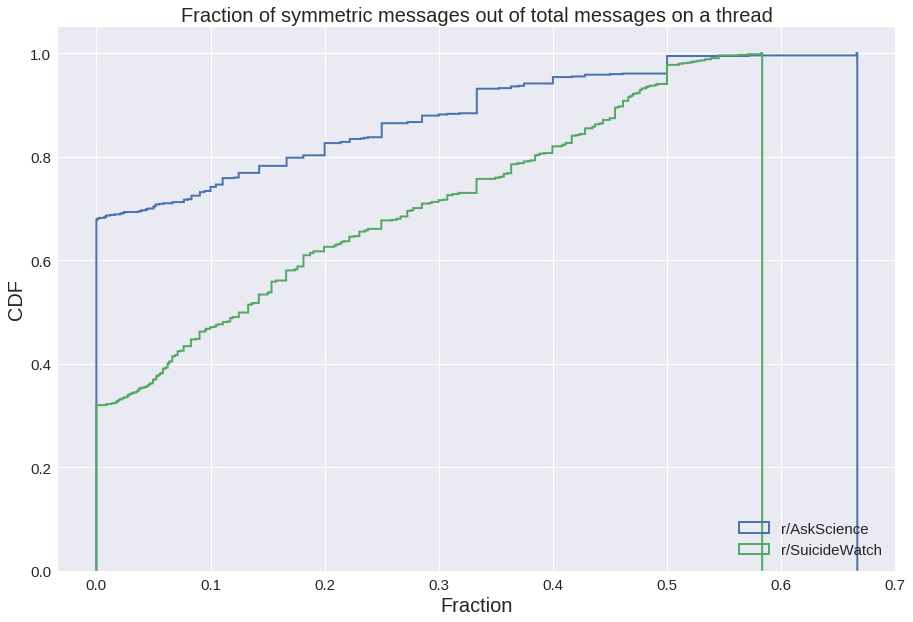

In [237]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [196]:
print np.median(BL_messageParti) , np.mean(BL_messageParti)
print np.median(SW_messageParti) , np.mean(SW_messageParti)

0.0 0.0799152487397
0.133333333333 0.177584977886


In [197]:
print len(BL_messageParti), len(SW_messageParti)

stats , pvalue = findMannWhitney(BL_messageParti , SW_messageParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_messageParti , BL_messageParti)
print stats/normstats, pvalue

886 922
248433.5 1.12169152527e-46
Samples are same size, no need to resample
0.632954817604 1.12169152527e-46


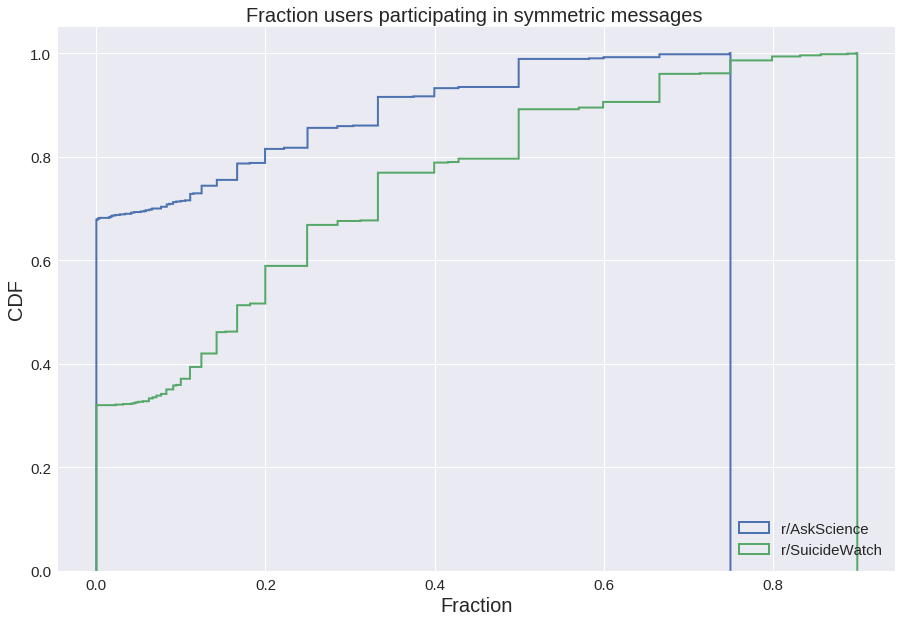

In [198]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [163]:
print np.median(BL_userParti) , np.mean(BL_userParti)
print np.median(SW_userParti) , np.mean(SW_userParti)

0.0 0.0926065389494
0.166666666667 0.250500638239


In [164]:
print len(BL_userParti), len(SW_userParti)

stats , pvalue = findMannWhitney(BL_userParti , SW_userParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_userParti , BL_userParti)
print stats/normstats, pvalue

886 922
235540.5 1.26379605138e-54
Samples are same size, no need to resample
0.60010624258 1.26379605138e-54


In [165]:
len(opAuthors_SW) , len(SW_bpusers)

(10157, 923)

In [166]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(-1,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error


# def get

In [167]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(sampledReply_SW,SW_bpusers,opAuthors_SW)
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,31)
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,31)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

32 32 32 32


In [168]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,31)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,31)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

32 32 32 32


In [169]:
# sns.distplot(rootEmoDict[7])

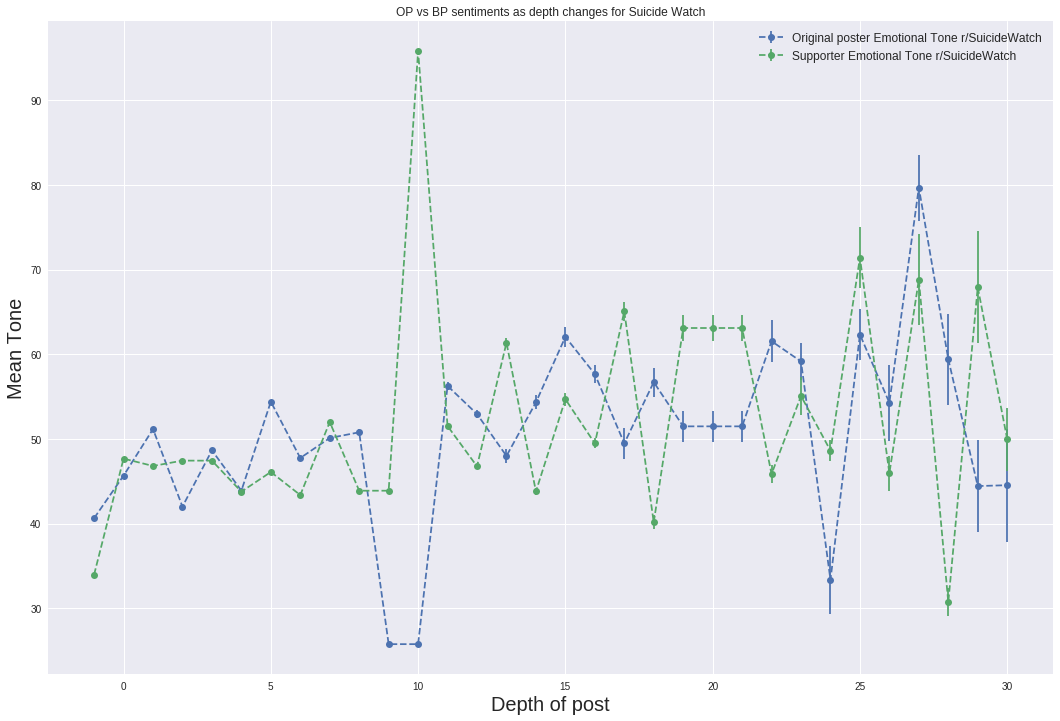

In [170]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

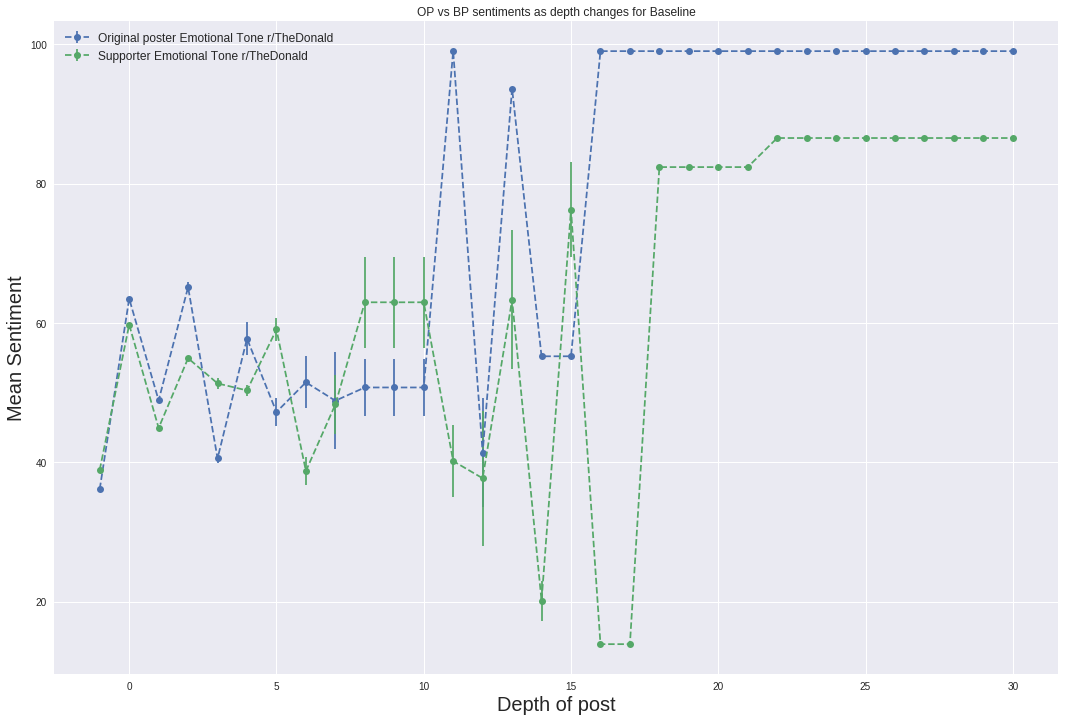

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/TheDonald' , 'Supporter Emotional Tone r/TheDonald'], fontsize=12)

In [112]:
triangleDist_SW = [sum(list(nx.triangles(sampledUgraphs_SW[k].to_undirected()).values()))/3 for k in sampledUgraphs_SW]
triangleDist_BL = [sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 for k in filteredUGraphs_BL]

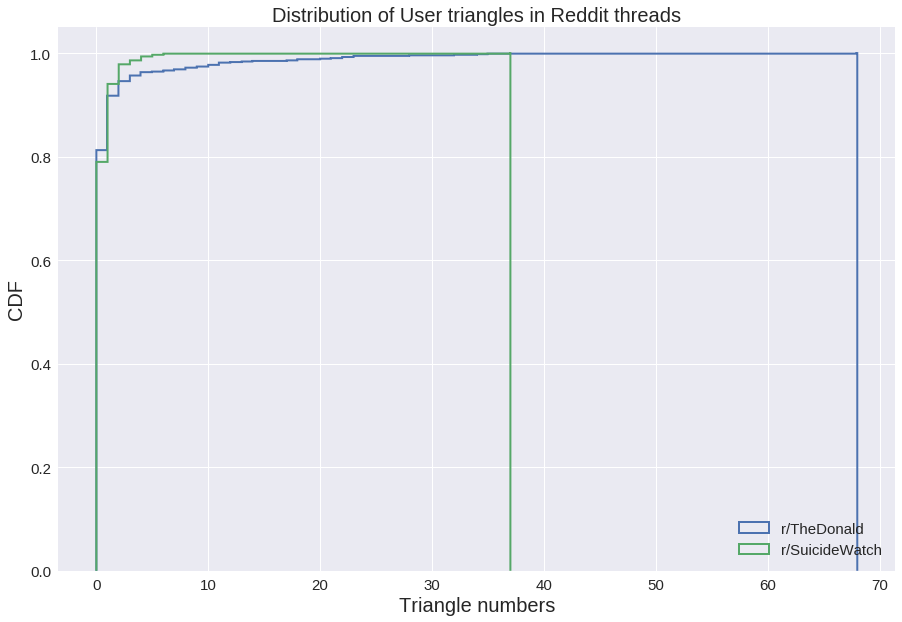

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/TheDonald','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [114]:
print len(triangleDist_BL), len(triangleDist_SW)

stats , pvalue = findMannWhitney(triangleDist_BL , triangleDist_SW)
print stats , pvalue
normstats , normpvalue = findMannWhitney(triangleDist_BL , triangleDist_BL)
print stats/normstats, pvalue

923 923
Samples are same size, no need to resample
419742.0 0.217295745215
Samples are same size, no need to resample
0.985391975153 0.217295745215


In [115]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [116]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [117]:
# len(SW_Posts)

In [118]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer

In [119]:
class Tokenizer:
    def __init__(self):
        print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
            texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenizeByRegEx(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

In [120]:
len(opAuthors_SW), len(allGraphs_SW)

(10157, 10157)

In [207]:
SW_bpusers_all

{'vj5co': [u'zombiemeds'],
 '1uv2vj': [],
 'fjatc': [u'dead_by_saturday'],
 '1x6boy': [u'throwawayacct424'],
 '97akw': [u'[deleted]', u'PossiblePerson'],
 '3ci391': [u'peanutpeepz'],
 's79sc': [u'fuck_usernames123'],
 '2tjz9s': [u'BearDidIt'],
 'b0mvj': [u'itisover'],
 '2u23m8': [],
 'e9cx6': [],
 '19iji1': [u'IamANidiot21'],
 'mae5s': [],
 'ci9lz': [u'dontwannabehere'],
 '24gto5': [u'youcaughtthelight'],
 'dwd3s': [],
 '29en0c': [u'Ingvarkarlsson', u'throwawaybcirl'],
 '37zjrf': [u'pathfinder89'],
 '1cz1sd': [u'KimmyJongJong'],
 'ee901': [u'comb_over', u'southernbrew08'],
 '2nnud5': [],
 '2wo3jj': [u'throwitbitch1'],
 '1h1vqu': [u'nopointnow', u'rainbowtwinkies'],
 '16hiex': [u'griffin_desantos'],
 'e1hjc': [u'[deleted]'],
 'osxp1': [u'bleepitybleep', u'[deleted]', u'skekze'],
 '1dptdp': [u'muramana', u'endlesswatchdog'],
 '2lhvye': [],
 '2at60d': [u'Jessica-EdgeBlade'],
 '1p4pqm': [u'TMRobotic'],
 'ylt41': [],
 '2hip0u': [u'Missing_love'],
 'xwu8q': [u'1800HEYGTFO'],
 '1dqizr': [u'bu

In [238]:
# print len(SW_bpusers_all)
# with open("BpUserDict.pkl",'wb') as f:
#     pkl.dump(SW_bpusers_all,f)

10157


In [122]:
Multiple_BP = {}
allUsers = []
for k in SW_bpusers_all:
    for u in SW_bpusers_all[k]:
        if u in allUsers:
            if u not in Multiple_BP:
                Multiple_BP[u] = 2
            else:
                Multiple_BP[u]+=1
        else:
            allUsers.append(u)
    
    

In [123]:
del Multiple_BP['[deleted]']

In [124]:
len(Multiple_BP)

1063

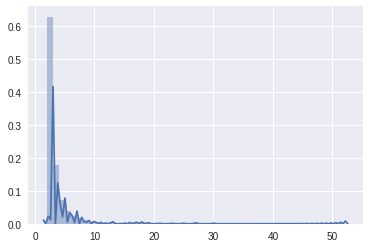

In [129]:
sns.distplot(Multiple_BP.values())

In [130]:
SW_multbpUsers = {}
for k in SW_bpusers_all:
    SW_multbpUsers[k] = []
    for m in SW_bpusers_all[k]:
        if m in Multiple_BP.keys():
            SW_multbpUsers[k].append(m)

In [151]:
# with open("multipleBP.pkl",'wb') as f:
#     pkl.dump(SW_multbpUsers,f)

In [132]:
len(SW_bpusers)

923

In [133]:
SW_IR_posts = getIRTexts(allGraphs_SW,opAuthors_SW,SW_bpusers)

In [134]:
SW_Texts = getAllText(allGraphs_SW)

{}


In [135]:
len(SW_IR_posts),len(SW_Texts)

(8784, 207176)

In [136]:
# SW_IR_posts[:10]

In [239]:
opAuthors_SW['pfn0u']

u'gabstergirl'

In [137]:
SW_OP_posts = getOPTexts(allGraphs_SW,opAuthors_SW)


In [138]:
len(SW_OP_posts)

44489

In [139]:
# SW_OP_posts[:10]

In [140]:
SW_BP_posts = getBPTexts(allGraphs_SW, SW_bpusers)

In [141]:
SW_MultBP_posts = getBPTexts(allGraphs_SW,SW_multbpUsers)

In [142]:
len(SW_MultBP_posts)

22173

In [143]:
len(SW_BP_posts)

6864

In [144]:
# SW_BP_posts[:10]

In [145]:
sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [146]:
len(SW_OP_posts) , len(SW_BP_posts) , len(sampled_SW_IR_Posts)

(44489, 6864, 6864)

In [147]:
OP_tokenized = tokenizeTexts(SW_OP_posts)
BP_tokenized = tokenizeTexts(SW_BP_posts)
IR_tokenized = tokenizeTexts(SW_IR_posts)

Created Tokenizer
Created Tokenizer
Created Tokenizer


In [148]:
All_cleaned = tokenizeTexts(SW_Texts)

Created Tokenizer


In [209]:
MultBP_tokenized = tokenizeTexts(SW_MultBP_posts)

Created Tokenizer


In [210]:
len(All_cleaned)

207176

In [211]:
len(OP_tokenized) , len(BP_tokenized)

(44489, 6864)

In [212]:
OP_tokenized[1]

[u've',
 u'overcom',
 u'fear',
 u'death',
 u'now',
 u'can',
 u'go',
 u'live',
 u'life',
 u'differ',
 u'way',
 u'don',
 u't',
 u'give',
 u'soon',
 u'friend']

In [213]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(All_cleaned)
dictionary_BP =gensim.corpora.Dictionary(BP_tokenized)
dictionary_IR =gensim.corpora.Dictionary(IR_tokenized)

In [214]:
len(dictionary_BP), len(dictionary_IR)

(11165, 12191)

In [215]:
# len(dictionary_OP) , len(dictionary_BP)

In [216]:
# convert tokenized documents into a document-term matrix
# corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
corpus_BP = [dictionary.doc2bow(text) for text in BP_tokenized]
corpus_IR = [dictionary.doc2bow(text) for text in IR_tokenized]

In [217]:
All_corpus = [dictionary.doc2bow(text) for text in All_cleaned]

In [218]:
MultBP_corpus = [dictionary.doc2bow(text) for text in MultBP_tokenized]

In [219]:
BP_tokenized[3]

[u'comebackmom',
 u'isn',
 u't',
 u'just',
 u'one',
 u'number',
 u'two',
 u've',
 u'can',
 u't',
 u've',
 u'tri',
 u'hard',
 u'big',
 u'person',
 u'show',
 u'kid',
 u'integr',
 u'right',
 u'thing',
 u'woman',
 u'keep',
 u'wrong',
 u'thing',
 u'yet',
 u'reap',
 u'reward',
 u'action',
 u'right',
 u'can',
 u'keep',
 u'fight',
 u'keep',
 u'saniti',
 u's',
 u'exampl',
 u'current',
 u'divorc',
 u'fight',
 u'left',
 u'almost',
 u'full',
 u'year',
 u'ago',
 u'now',
 u'break',
 u'hous',
 u'take',
 u'anyth',
 u'paid',
 u'call',
 u'rub',
 u'noth',
 u'now',
 u'decid',
 u'want',
 u'now',
 u'new',
 u'place',
 u'want',
 u'famili',
 u'cat',
 u's',
 u'taken',
 u'court',
 u'made',
 u'spend',
 u'1000',
 u'just',
 u'can',
 u'keep',
 u'someth',
 u'stabl',
 u'kid',
 u'now',
 u'court',
 u'say',
 u'joint',
 u'custodi',
 u'cat',
 u'everyon',
 u'say',
 u'just',
 u'give',
 u'ask',
 u'get',
 u'can',
 u't',
 u'bigger',
 u'person',
 u'just',
 u'move',
 u'cant',
 u'say',
 u'ok',
 u're',
 u'right',
 u've',
 u'gone',


In [220]:
len(corpus_BP) , len(corpus_IR)

(6864, 8784)

In [221]:
len(corpus_BP)

6864

In [222]:
# type(corpus_OP)

In [223]:
ldamodel = gensim.models.ldamodel.LdaModel(All_corpus, id2word=dictionary, num_topics=20) 

In [236]:
# generate LDA model
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, num_topics=100, id2word = dictionary_OP, passes=20)
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, id2word=dictionary, num_topics=50) 

ldamodel_IR = gensim.models.ldamodel.LdaModel(corpus_IR, id2word=dictionary, num_topics=20) 



In [ ]:
# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, num_topics=100, id2word = dictionary_BP, passes=20)
ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, id2word=dictionary, num_topics=10) 

# ldamodel[All_corpus[11]]

In [225]:
ldamodel_MultBP = gensim.models.ldamodel.LdaModel(MultBP_corpus, id2word=dictionary, num_topics=10) 

In [226]:
pyLDAvis.enable_notebook()
multbp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_MultBP,corpus=MultBP_corpus,dictionary=dictionary)
pyLDAvis.display(multbp_topic_display)

In [227]:


# turn on automatic rendering of visualizations
pyLDAvis.enable_notebook()
bp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_BP,corpus=corpus_BP,dictionary=dictionary)
pyLDAvis.display(bp_topic_display)

In [228]:
# turn on automatic rendering of visualizations
pyLDAvis.enable_notebook()

ir_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_IR,corpus=corpus_IR,dictionary=dictionary)
pyLDAvis.display(ir_topic_display)

In [229]:
ldamodel_BP.print_topics(10)

# ldamodel_OP.print_topics(10)



[(0,
  u'0.006*"t" + 0.004*"like" + 0.003*"just" + 0.003*"don" + 0.003*"life" + 0.002*"want" + 0.002*"m" + 0.002*"thing" + 0.002*"can" + 0.002*"chang"'),
 (1,
  u'0.009*"s" + 0.007*"like" + 0.006*"feel" + 0.006*"just" + 0.005*"t" + 0.004*"know" + 0.004*"go" + 0.003*"will" + 0.003*"better" + 0.003*"get"'),
 (2,
  u'0.008*"thank" + 0.002*"grandmoth" + 0.002*"attach" + 0.002*"band" + 0.002*"t" + 0.001*"fuck" + 0.001*"user" + 0.001*"j" + 0.001*"s" + 0.001*"2000"'),
 (3,
  u'0.013*"s" + 0.009*"t" + 0.008*"m" + 0.008*"go" + 0.007*"remov" + 0.007*"play" + 0.006*"just" + 0.005*"can" + 0.004*"http" + 0.004*"like"'),
 (4,
  u'0.016*"t" + 0.012*"don" + 0.007*"m" + 0.007*"want" + 0.005*"know" + 0.005*"think" + 0.004*"just" + 0.004*"make" + 0.004*"feel" + 0.003*"one"'),
 (5,
  u'0.013*"just" + 0.010*"can" + 0.010*"t" + 0.009*"s" + 0.008*"thing" + 0.008*"think" + 0.007*"want" + 0.007*"help" + 0.007*"m" + 0.007*"go"'),
 (6,
  u'0.010*"s" + 0.010*"t" + 0.007*"m" + 0.007*"thing" + 0.007*"like" + 0.007*

In [230]:
ldamodel_IR.print_topics(10)

[(0,
  u'0.029*"t" + 0.018*"s" + 0.017*"can" + 0.014*"just" + 0.013*"don" + 0.013*"feel" + 0.012*"m" + 0.011*"like" + 0.011*"know" + 0.011*"get"'),
 (1,
  u'0.026*"t" + 0.014*"don" + 0.014*"s" + 0.010*"can" + 0.009*"know" + 0.009*"like" + 0.008*"remov" + 0.007*"just" + 0.007*"think" + 0.006*"thing"'),
 (2,
  u'0.006*"t" + 0.003*"ve" + 0.003*"peopl" + 0.003*"metaphor" + 0.002*"don" + 0.002*"way" + 0.002*"life" + 0.002*"feel" + 0.002*"want" + 0.002*"m"'),
 (3,
  u'0.010*"s" + 0.008*"can" + 0.007*"t" + 0.006*"pleas" + 0.005*"help" + 0.005*"call" + 0.005*"like" + 0.005*"don" + 0.004*"get" + 0.004*"just"'),
 (4,
  u'0.016*"t" + 0.015*"life" + 0.011*"get" + 0.011*"will" + 0.010*"s" + 0.009*"can" + 0.008*"don" + 0.008*"year" + 0.007*"m" + 0.007*"time"'),
 (5,
  u'0.011*"s" + 0.009*"go" + 0.007*"just" + 0.007*"thank" + 0.006*"t" + 0.005*"realli" + 0.005*"m" + 0.005*"one" + 0.005*"time" + 0.004*"tri"'),
 (6,
  u'0.009*"im" + 0.008*"like" + 0.006*"can" + 0.006*"peopl" + 0.005*"just" + 0.004*"thi

In [231]:
dictionary.values().index('harm')

43068

In [232]:
# ldamodel.save("SW_Alltext.mdl")

In [233]:
ldamodel_IR.get_term_topics('help')

[]

In [234]:
opTexts = []
responseTexts = []
for k in convChainsSW:
    op = convChainsSW[k]['op']
    bp = convChainsSW[k]['bp']
    for p in op:
        opTexts.append(p['text'].decode("utf-8", "ignore"))
    for p in bp:
        responseTexts.append(p['text'].decode("utf-8", "ignore"))
    

In [235]:
SW_sampled_MultBP_posts = random.sample(SW_MultBP_posts,len(SW_IR_posts)

SyntaxError: unexpected EOF while parsing (<ipython-input-235-125e59aca51b>, line 1)

In [ ]:
len(SW_sampled_MultBP_posts)

In [ ]:
opCleaned = tokenizeTexts(SW_IR_posts)
bpCleaned = tokenizeTexts(SW_sampled_MultBP_posts)

In [ ]:
len(opCleaned), len(bpCleaned)

In [ ]:
# op_corpus = [dictionary.doc2bow(text) for text in opCleaned]
# bp_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

In [ ]:
IR_corpus = [dictionary.doc2bow(text) for text in opCleaned]

In [ ]:
response_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

In [ ]:
SW_IR_posts[1]

In [ ]:
SW_sampled_MultBP_posts[50]

In [ ]:
ldamodel.get_document_topics(IR_corpus[50])

In [ ]:
ldamodel.get_document_topics(bp_corpus[50])

In [ ]:
from empath import Empath
dimensions = ["health","suffering" , "hate", "aggression", "sympathy", "listen", "disgust", "help","negative_emotion" ,"positive_emotion"]
def corpustoVectors(model , corpus , origText ,label):
    if len(corpus) != len(origText):
        print " Something is wrong, BOW corpus size should be same as original text size"
        
    lexicon = Empath()
    featureVectors = [] 
    for c in range(len(corpus)):
        topics = model.get_document_topics(corpus[c])
        affects = lexicon.analyze(origText[c],categories=dimensions,  normalize=True)
#         affects = lexicon.analyze(origText[c],  normalize=True)
#         print len(affects)
        if affects == None:
#             affvec = np.asarray([0.0 for k in range(194)])
            affvec = np.asarray([0.0 for k in range(10)])
        else:
            affvec = np.asarray([affects[k] for k in affects])
        topvec = np.zeros(21)
        for t in topics:
            topvec[t[0]] = t[1]
        topvec[-1] = label
        finalVec = np.append(affvec,topvec)
        featureVectors.append(finalVec.T)
    return featureVectors

In [ ]:
opFeats = corpustoVectors(ldamodel,IR_corpus,SW_IR_posts, 1.0)

In [ ]:
len(opFeats) , len(opFeats[1])

In [ ]:
bpFeats = corpustoVectors(ldamodel,response_corpus,SW_sampled_MultBP_posts,0.0)

In [ ]:
len(bpFeats) , len(bpFeats[1])

In [ ]:
print bpFeats[1][-1], opFeats[1][-1]

In [ ]:
totFeats = opFeats + bpFeats
len(totFeats) , len(totFeats[1])

In [ ]:
featMatrix = np.asmatrix(totFeats)

In [ ]:
featMatrix.shape

In [ ]:
np.random.shuffle(featMatrix)

In [ ]:
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.1, random_state=0)
clfRF = RandomForestClassifier(n_estimators=10000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

In [ ]:
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

In [ ]:
accuracy_score(y_test , RF_predict)

In [ ]:
from sklearn.svm import LinearSVC

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 20), random_state=1)
clf.fit(X_train, y_train)

In [ ]:
SVM_predict = clfRF.predict(X_test)

In [ ]:
MLP_Predict = clf.predict(X_test)
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, SVM_predict, average='binary')
print precision,recall,fscore

In [ ]:
topics = ldamodel.print_topics(128)

In [ ]:
topics[1:10]